In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/national-health-and-nutrition-examination-survey/examination.csv
/kaggle/input/national-health-and-nutrition-examination-survey/medications.csv
/kaggle/input/national-health-and-nutrition-examination-survey/demographic.csv
/kaggle/input/national-health-and-nutrition-examination-survey/labs.csv
/kaggle/input/national-health-and-nutrition-examination-survey/questionnaire.csv
/kaggle/input/national-health-and-nutrition-examination-survey/diet.csv


# **Evaluating Metabolic and Lifestyle Indicators for Early HCC Risk Flagging: A Population-Based Exploratory Study**
# A pooled NHANES analysis

## Table of Contents

### 1. Introduction
1.1 Background and motivation  
1.2 Hepatocellular carcinoma and the challenge of late detection  
1.3 Metabolic dysfunction, lifestyle factors, and early liver injury  
1.4 Rationale for a population-based risk stratification approach  
1.5 Study objective and analytical scope  


### 2. Data Sources and Preparation
2.1 Overview of NHANES datasets used  
2.2 Dataset selection and justification  
2.3 Dataset linkage and participant cohort construction  
2.4 Variable selection and clinical rationale  
2.5 Outcome definition: elevated AST as an early liver injury proxy  
2.6 Handling missingness and data exclusions  


### 3. Exploratory Data Analysis
3.1 Cohort characteristics and outcome prevalence  
3.2 Distribution of liver enzyme markers  
3.3 Metabolic indicators: glucose, insulin, BMI, and waist circumference  
3.4 Lifestyle indicators: alcohol exposure, smoking, and physical inactivity  
3.5 Key patterns motivating formal statistical testing  


### 4. Statistical Analysis Framework
4.1 Analytical strategy overview  
4.2 Justification for non-parametric and categorical testing  
4.3 Rationale for multivariable modelling and regularization  
4.4 Interpretation principles and limitations  


### 5. Step 3.1: Unadjusted Associations

#### 5.1A Continuous Variables
- Serum glucose  
- Insulin  
- Body mass index  
- Waist circumference  

5.1A.1 Hypotheses and statistical tests  
5.1A.2 Median comparisons and distributional differences  
5.1A.3 Interpretation of p-values and effect magnitude  

#### 5.1B Categorical Variables
- Smoking status  
- Alcohol frequency  
- Physical inactivity  

5.1B.1 Contingency tables and chi-square testing  
5.1B.2 Interpretation of observed distributions  
5.1B.3 Summary of unadjusted signals  


### 6. Step 3.2: Adjusted Multivariable Modelling
6.1 Model specification and covariate inclusion  
6.2 Use of L1-regularized logistic regression  
6.3 Model convergence and global fit  
6.4 Adjusted associations and interpretation  
6.5 Odds ratios and confidence intervals  
6.6 Implications for early liver risk stratification  


### 7. Step 3.3: Predicted Risk and Risk Stratification
7.1 Generation of predicted risk scores  
7.2 Distribution of predicted risk by AST group  
7.3 Risk decile stratification  
7.4 Concentration of elevated AST cases in high-risk strata  
7.5 Model discrimination (ROC curve and AUC)  
7.6 Interpretation for early warning use cases  


### 8. Step 3.4: Model Calibration
8.1 Why calibration matters for clinical and public health risk models  
8.2 Calibration curve interpretation  
8.3 Agreement between predicted and observed risk  
8.4 Brier score and probabilistic accuracy  
8.5 Reliability of risk estimates in low-prevalence settings  


### 9. Summary of Findings
9.1 Key metabolic and lifestyle signals  
9.2 Strengths and limitations of the modelling approach  
9.3 What this analysis demonstrates and what it does not  
9.4 Implications for early liver risk prevention  


### 10. Relevance to Digital Health and GlucoDict
10.1 Translating population-level risk into individual monitoring  
10.2 Why diabetes-focused platforms are well-positioned for this approach  
10.3 How metabolic and lifestyle data enable early warning systems  
10.4 Positioning this analysis as Phase 3 feasibility evidence  


### 11. Conclusion and Next Steps
11.1 Conclusions from the NHANES feasibility analysis  
11.2 Directions for future validation and refinement  
11.3 Integration into GlucoDict’s phased roadmap  

# **1. Project overview**

Hepatocellular carcinoma is among the most lethal cancers globally, largely due to late-stage detection when curative treatment options are limited. Despite advances in imaging and clinical diagnostics, early detection of liver cancer remains challenging, particularly at the population level. As a result, prevention strategies increasingly focus on identifying and intervening on upstream risk factors that contribute to progressive liver injury long before malignant transformation occurs.

Metabolic dysfunction and lifestyle-related factors, including obesity, insulin resistance, diabetes, alcohol consumption, and physical inactivity, are well-established contributors to chronic liver disease and subsequent hepatocellular carcinoma risk. From a public health perspective, early identification of individuals exhibiting adverse metabolic and behavioural patterns offers an opportunity to implement preventive interventions that may halt or slow disease progression.

However, population datasets rarely contain reliable labels for early-stage liver cancer, limiting direct outcome-based modelling. In such contexts, liver enzyme abnormalities and related biomarkers are commonly used as early indicators of liver stress and injury, serving as practical proxies for early risk assessment.

This study adopts a public health–led exploratory approach to evaluate whether metabolic and lifestyle indicators, individually and in combination, align with early liver vulnerability signals in a large population dataset. Rather than attempting to diagnose liver cancer, the analysis assesses the feasibility of flagging elevated risk states that may precede advanced disease. These findings aim to inform prevention-oriented strategies and support the design of digital health tools, such as GlucoDict, that leverage routinely collected metabolic and behavioural data for early risk awareness and intervention.

This notebook is structured to be reproducible and publication ready. It will produce a merged participant level dataset from six NHANES components and establish a defensible target proxy for early liver risk.

# Overall Aim

To assess whether metabolic and lifestyle indicators can be used to flag early liver cancer risk signals in a population dataset, supporting prevention-focused public health strategies and digital health applications.

# Objectives
	1.	To describe the distribution of liver biomarkers, metabolic indicators, and lifestyle factors associated with liver disease risk.
	2.	To examine whether individuals exhibiting early liver vulnerability signals differ in metabolic and lifestyle profiles compared to those without such signals.
	3.	To explore whether combinations of metabolic and lifestyle factors provide stronger early risk signals than individual variables alone.
	4.	To evaluate the suitability and limitations of population-level proxies for informing early liver cancer prevention strategies.

# **Introduction**

Hepatocellular carcinoma represents a major global health burden, characterised by high mortality rates driven largely by late-stage diagnosis. In many cases, liver cancer is detected only after extensive disease progression, when treatment options are limited and survival outcomes are poor. From a public health perspective, this highlights the urgent need for strategies that identify risk earlier and enable preventive intervention before irreversible damage occurs.

Chronic liver disease and hepatocellular carcinoma frequently develop following prolonged exposure to metabolic and lifestyle-related risk factors, including obesity, insulin resistance, diabetes, excessive alcohol consumption, and physical inactivity. These factors contribute to progressive liver injury over time, creating opportunities for early risk identification long before malignant transformation.

Despite the importance of early detection, population-level datasets rarely contain reliable indicators of early-stage liver cancer, limiting the feasibility of direct outcome-based prediction. As a result, surrogate markers of liver stress, such as liver enzyme abnormalities, are commonly used to assess early vulnerability in epidemiological and public health research.

At the same time, digital health platforms increasingly collect detailed metabolic, lifestyle, and behavioural data, particularly among individuals with diabetes and related metabolic conditions. Leveraging these routinely collected signals to flag early liver cancer risk aligns with prevention-focused public health strategies and offers a scalable approach to reducing disease burden.

This study evaluates whether metabolic and lifestyle indicators can support early liver cancer risk flagging in a population dataset using proxy markers of liver vulnerability. By examining patterns of association rather than disease diagnosis, the analysis aims to inform prevention strategies and guide the development of digital health tools such as GlucoDict, which seek to empower individuals and healthcare systems to act earlier in the disease trajectory.

# **Imports and file paths**

In [33]:
import os
import numpy as np
import pandas as pd

DATA_DIR = "/kaggle/input/national-health-and-nutrition-examination-survey"

paths = {
    "demographics": os.path.join(DATA_DIR, "demographic.csv"),
    "examination": os.path.join(DATA_DIR, "examination.csv"),
    "labs": os.path.join(DATA_DIR, "labs.csv"),
    "questionnaire": os.path.join(DATA_DIR, "questionnaire.csv"),
    "diet": os.path.join(DATA_DIR, "diet.csv"),
    "medications": os.path.join(DATA_DIR, "medications.csv"),
}

for k, v in paths.items():
    print(k, "->", v, "exists:", os.path.exists(v))

demographics -> /kaggle/input/national-health-and-nutrition-examination-survey/demographic.csv exists: True
examination -> /kaggle/input/national-health-and-nutrition-examination-survey/examination.csv exists: True
labs -> /kaggle/input/national-health-and-nutrition-examination-survey/labs.csv exists: True
questionnaire -> /kaggle/input/national-health-and-nutrition-examination-survey/questionnaire.csv exists: True
diet -> /kaggle/input/national-health-and-nutrition-examination-survey/diet.csv exists: True
medications -> /kaggle/input/national-health-and-nutrition-examination-survey/medications.csv exists: True


In [34]:
import os

DATA_DIR = "/kaggle/input/national-health-and-nutrition-examination-survey"

print("Files in dataset folder:")
for f in sorted(os.listdir(DATA_DIR)):
    print(" -", f)

Files in dataset folder:
 - demographic.csv
 - diet.csv
 - examination.csv
 - labs.csv
 - medications.csv
 - questionnaire.csv


In [35]:
import pandas as pd

paths = {
    "demographic": os.path.join(DATA_DIR, "demographic.csv"),
    "examination": os.path.join(DATA_DIR, "examination.csv"),
    "labs": os.path.join(DATA_DIR, "labs.csv"),
    "questionnaire": os.path.join(DATA_DIR, "questionnaire.csv"),
    "diet": os.path.join(DATA_DIR, "diet.csv"),
    "medications": os.path.join(DATA_DIR, "medications.csv"),
}

for k, v in paths.items():
    print(k, "->", v, "exists:", os.path.exists(v))

demographic -> /kaggle/input/national-health-and-nutrition-examination-survey/demographic.csv exists: True
examination -> /kaggle/input/national-health-and-nutrition-examination-survey/examination.csv exists: True
labs -> /kaggle/input/national-health-and-nutrition-examination-survey/labs.csv exists: True
questionnaire -> /kaggle/input/national-health-and-nutrition-examination-survey/questionnaire.csv exists: True
diet -> /kaggle/input/national-health-and-nutrition-examination-survey/diet.csv exists: True
medications -> /kaggle/input/national-health-and-nutrition-examination-survey/medications.csv exists: True


# **Load the six datasets**

In [36]:
dem = pd.read_csv(paths["demographic"])
dem.shape, dem.columns[:10]

((10175, 47),
 Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
        'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM'],
       dtype='object'))

In [37]:
import pandas as pd

def safe_read_csv(path):
    try:
        return pd.read_csv(path)
    except UnicodeDecodeError:
        # common fallback encodings
        try:
            return pd.read_csv(path, encoding="latin1")
        except UnicodeDecodeError:
            return pd.read_csv(path, encoding="cp1252", errors="replace")

In [38]:
exam = safe_read_csv(paths["examination"])
exam.shape, exam.columns[:10]

((9813, 224),
 Index(['SEQN', 'PEASCST1', 'PEASCTM1', 'PEASCCT1', 'BPXCHR', 'BPAARM',
        'BPACSZ', 'BPXPLS', 'BPXPULS', 'BPXPTY'],
       dtype='object'))

In [39]:
labs = safe_read_csv(paths["labs"])
labs.shape, labs.columns[:10]

((9813, 424),
 Index(['SEQN', 'URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'URDACT',
        'WTSAF2YR.x', 'LBXAPB', 'LBDAPBSI', 'LBXSAL'],
       dtype='object'))

In [40]:
quest = safe_read_csv(paths["questionnaire"])
quest.shape, quest.columns[:10]

((10175, 953),
 Index(['SEQN', 'ACD011A', 'ACD011B', 'ACD011C', 'ACD040', 'ACD110', 'ALQ101',
        'ALQ110', 'ALQ120Q', 'ALQ120U'],
       dtype='object'))

In [41]:
diet = safe_read_csv(paths["diet"])
diet.shape, diet.columns[:10]

((9813, 168),
 Index(['SEQN', 'WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
        'DR1DBIH', 'DR1DAY', 'DR1LANG'],
       dtype='object'))

In [42]:
meds = safe_read_csv(paths["medications"])
meds.shape, meds.columns[:10]

((20194, 13),
 Index(['SEQN', 'RXDUSE', 'RXDDRUG', 'RXDDRGID', 'RXQSEEN', 'RXDDAYS',
        'RXDRSC1', 'RXDRSC2', 'RXDRSC3', 'RXDRSD1'],
       dtype='object'))

# **Confirm SEQN and Uniqueness**

In [43]:
dfs = {
    "demographic": dem,
    "examination": exam,
    "labs": labs,
    "questionnaire": quest,
    "diet": diet,
    "medications": meds
}

for name, df in dfs.items():
    print(name, "| shape:", df.shape, "| has SEQN:", "SEQN" in df.columns)

print("\nUniqueness check (how many rows per SEQN):")
for name, df in dfs.items():
    if "SEQN" in df.columns:
        max_dupes = df["SEQN"].value_counts().max()
        print(name, "| max rows for one SEQN:", max_dupes)

demographic | shape: (10175, 47) | has SEQN: True
examination | shape: (9813, 224) | has SEQN: True
labs | shape: (9813, 424) | has SEQN: True
questionnaire | shape: (10175, 953) | has SEQN: True
diet | shape: (9813, 168) | has SEQN: True
medications | shape: (20194, 13) | has SEQN: True

Uniqueness check (how many rows per SEQN):
demographic | max rows for one SEQN: 1
examination | max rows for one SEQN: 1
labs | max rows for one SEQN: 1
questionnaire | max rows for one SEQN: 1
diet | max rows for one SEQN: 1
medications | max rows for one SEQN: 23


# **Aggregate Medications to One Row Per Participant**

In [44]:
# Quick view of medication columns
print(meds.columns[:30])

# Build simple medication flags from available text columns
# We search for common medication name fields and combine them safely.
text_cols = [c for c in meds.columns if meds[c].dtype == "object"]
print("Medication text columns detected:", text_cols[:10])

def row_text(x):
    return " ".join([str(v) for v in x if pd.notna(v)])

# Create one combined string per medication record (row)
meds["_med_text"] = meds[text_cols].apply(row_text, axis=1).str.upper()

# Participant-level flags
med_flags = meds.groupby("SEQN")["_med_text"].apply(lambda s: " ".join(s)).reset_index()

med_flags["on_diabetes_meds"] = med_flags["_med_text"].str.contains(
    "METFORM|INSULIN|GLIP|SULF|GLYB|GLIME|SITAG|LIRAG|SEMAG|DAPAG|EMPA", regex=True
).astype(int)

med_flags["on_statins"] = med_flags["_med_text"].str.contains(
    "STATIN|ATORV|SIMV|ROSU|PRAV|LOVA|FLUVA|PITAVA", regex=True
).astype(int)

med_flags = med_flags[["SEQN", "on_diabetes_meds", "on_statins"]]

med_flags.head()

Index(['SEQN', 'RXDUSE', 'RXDDRUG', 'RXDDRGID', 'RXQSEEN', 'RXDDAYS',
       'RXDRSC1', 'RXDRSC2', 'RXDRSC3', 'RXDRSD1', 'RXDRSD2', 'RXDRSD3',
       'RXDCOUNT'],
      dtype='object')
Medication text columns detected: ['RXDDRUG', 'RXDDRGID', 'RXDRSC1', 'RXDRSC2', 'RXDRSC3', 'RXDRSD1', 'RXDRSD2', 'RXDRSD3']


,SEQN,on_diabetes_meds,on_statins
0,73557,1,0
1,73558,1,1
2,73559,1,1
3,73560,0,0
4,73561,0,0


# **Merge all datasets into one table**

In [45]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [46]:
merged = dem.merge(exam, on="SEQN", how="left") \
            .merge(labs, on="SEQN", how="left") \
            .merge(quest, on="SEQN", how="left") \
            .merge(diet, on="SEQN", how="left") \
            .merge(med_flags, on="SEQN", how="left")

print("Merged table shape:", merged.shape)
print("Unique participants:", merged["SEQN"].nunique())
print(merged.iloc[:5, :15].to_string(index=False))
# Replace inf values that sometimes appear after merges or type conversions
merged = merged.replace([np.inf, -np.inf], np.nan)

Merged table shape: (10175, 1814)
Unique participants: 10175
 SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  RIDRETH3  RIDEXMON  RIDEXAGM  DMQMILIZ  DMQADFC  DMDBORN4  DMDCITZN  DMDYRSUS
73557         8         2         1        69       NaN         4         4       1.0       NaN       1.0      1.0         1       1.0       NaN
73558         8         2         1        54       NaN         3         3       1.0       NaN       2.0      NaN         1       1.0       NaN
73559         8         2         1        72       NaN         3         3       2.0       NaN       1.0      1.0         1       1.0       NaN
73560         8         2         1         9       NaN         3         3       1.0     119.0       NaN      NaN         1       1.0       NaN
73561         8         2         2        73       NaN         3         3       1.0       NaN       2.0      NaN         1       1.0       NaN


# **Data curation and variable harmonisation**

This section consolidates demographic, examination, laboratory, questionnaire, dietary, and medication related variables into a single analysis-ready dataset with human-readable variable names. This dataset serves as the foundation for all subsequent analyses, modelling, visualisation, and publication outputs.

# Final renaming map (ALL variables)

In [47]:
# ============================
# FINAL VARIABLE RENAME MAP
# ============================

rename_map_final = {

    # ----------------
    # Demographics
    # ----------------
    "RIDAGEYR": "age_years",
    "RIAGENDR": "sex",
    "RIDRETH3": "race_ethnicity",
    "DMDEDUC2": "education_level",
    "INDFMIN2": "family_income_category",

    # ----------------
    # Examination
    # ----------------
    "BMXBMI": "bmi",
    "BMXWAIST": "waist_circumference_cm",
    "BPXSY3": "systolic_bp",
    "BPXDI3": "diastolic_bp",

    # ----------------
    # Liver biomarkers
    # ----------------
    "LBXSASSI": "ast_u_l",
    "LBXSATSI": "alt_u_l",
    "LBXSAPSI": "alp_iu_l",
    "LBXSGTSI": "ggt_u_l",
    "LBDSTBSI": "total_bilirubin_umol_l",

    # ----------------
    # Diabetes & metabolic labs
    # ----------------
    "LBXIN": "insulin_uU_ml",
    "LBDINSI": "insulin_pmol_l",
    "LBXGLU": "fasting_glucose_mg_dl",
    "LBDGLUSI": "fasting_glucose_mmol_l",
    "LBXSGL": "serum_glucose_refrigerated_mg_dl",
    "LBXTC": "total_cholesterol_mg_dl",
    "LBDTCSI": "total_cholesterol_mmol_l",

    # ----------------
    # Alcohol
    # ----------------
    "ALQ110": "ever_had_12plus_alcohol",
    "ALQ120Q": "alcohol_frequency",
    "ALQ120U": "alcohol_unit",
    "ALQ130": "alcohol_quantity",
    "ALQ151": "daily_drinker",

    # ----------------
    # Smoking
    # ----------------
    "SMQ040": "smoking_status",

    # ----------------
    # Physical activity
    # ----------------
    "PAD615": "vigorous_activity_minutes",
    "PAD630": "moderate_activity_minutes",

    # ----------------
    # Diabetes history & treatment
    # ----------------
    "DID040": "age_diabetes_diagnosis",
    "DID060": "years_on_insulin",
    "DIQ050": "currently_on_insulin",
    "DIQ070": "on_oral_diabetes_meds",
    "DIQ180": "recent_high_blood_sugar_test",

    # ----------------
    # Liver & cancer history (controls)
    # ----------------
    "MCQ160I": "ever_diagnosed_liver_condition",
    "MCQ220": "ever_diagnosed_cancer",

    # ----------------
    # Hepatitis
    # ----------------
    "HEQ010": "hepatitis_b_status",
    "HEQ030": "hepatitis_c_status",

    # ----------------
    # Diet
    # ----------------
    "DR1IKCAL": "total_energy_kcal",
    "DR2TALCO": "dietary_alcohol_g",
    "DR1TSUGR": "total_sugars_g",
    "DR1TTFAT": "total_fat_g",

    # ----------------
    # Engineered medication flags
    # ----------------
    "on_diabetes_meds": "on_diabetes_meds",
    "on_statins": "on_statins",
}

# Subset, rename, and build final dataset

In [48]:
# Keep only columns that actually exist (safety)
final_columns = [c for c in rename_map_final.keys() if c in merged.columns]

analysis_df_final = (
    merged[final_columns]
    .rename(columns=rename_map_final)
    .replace([np.inf, -np.inf], np.nan)
)

print("Final analysis dataset shape:", analysis_df_final.shape)
print("Unique participants:", analysis_df_final.shape[0])

analysis_df_final.head()

Final analysis dataset shape: (10175, 39)
Unique participants: 10175


,age_years,sex,race_ethnicity,education_level,family_income_category,bmi,waist_circumference_cm,systolic_bp,diastolic_bp,ast_u_l,alt_u_l,alp_iu_l,ggt_u_l,total_bilirubin_umol_l,insulin_uU_ml,insulin_pmol_l,serum_glucose_refrigerated_mg_dl,total_cholesterol_mg_dl,total_cholesterol_mmol_l,ever_had_12plus_alcohol,alcohol_frequency,alcohol_unit,alcohol_quantity,daily_drinker,smoking_status,vigorous_activity_minutes,moderate_activity_minutes,age_diabetes_diagnosis,years_on_insulin,currently_on_insulin,on_oral_diabetes_meds,recent_high_blood_sugar_test,ever_diagnosed_cancer,hepatitis_b_status,hepatitis_c_status,total_sugars_g,total_fat_g,on_diabetes_meds,on_statins
0,69,1,4,3.0,4.0,26.7,100.0,102.0,74.0,16.0,16.0,129.0,16.0,13.68,NaN,NaN,554.0,167.0,4.32,NaN,1.0,3.0,1.0,1.0,3.0,NaN,NaN,62.0,5.0,1.0,1.0,NaN,2.0,2.0,2.0,176.47,52.81,1,0
1,54,1,3,3.0,7.0,28.6,107.6,156.0,42.0,18.0,29.0,97.0,15.0,15.39,NaN,NaN,219.0,170.0,4.40,NaN,7.0,1.0,4.0,1.0,2.0,NaN,10.0,23.0,1.0,1.0,2.0,NaN,2.0,2.0,2.0,44.99,124.29,1,1
2,72,1,3,4.0,10.0,28.9,109.2,146.0,80.0,22.0,16.0,99.0,13.0,10.26,5.83,34.98,183.0,126.0,3.26,NaN,0.0,NaN,NaN,2.0,3.0,NaN,30.0,57.0,16.0,1.0,2.0,NaN,1.0,2.0,2.0,102.90,65.97,1,1
3,9,1,3,NaN,9.0,17.1,61.0,104.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,4.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0,80.58,58.27,0,0
4,73,2,3,5.0,15.0,19.7,NaN,142.0,86.0,36.0,28.0,78.0,31.0,8.55,6.12,36.72,104.0,201.0,5.20,NaN,0.0,NaN,NaN,2.0,NaN,NaN,30.0,NaN,NaN,2.0,NaN,1.0,2.0,2.0,2.0,87.78,55.36,0,0


In [49]:
# Create elevated AST indicator using sex-specific thresholds
analysis_df_final['elevated_ast'] = (
    ((analysis_df_final['sex'] == 1) & (analysis_df_final['ast_u_l'] > 40)) |
    ((analysis_df_final['sex'] == 2) & (analysis_df_final['ast_u_l'] > 35))
).astype(int)

# Quick sanity check
analysis_df_final['elevated_ast'].value_counts(dropna=False)

elevated_ast
0    9776
1     399
Name: count, dtype: int64

In [155]:
# Create physical inactivity indicator
analysis_df_final['physically_inactive'] = (
    (analysis_df_final['vigorous_activity_minutes'].fillna(0) == 0) &
    (analysis_df_final['moderate_activity_minutes'].fillna(0) == 0)
).astype(int)

# Sanity check
analysis_df_final['physically_inactive'].value_counts(dropna=False)

physically_inactive
1    7544
0    2631
Name: count, dtype: int64

In [156]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [157]:
analysis_df_final.head(10)

,age_years,sex,race_ethnicity,education_level,family_income_category,bmi,waist_circumference_cm,systolic_bp,diastolic_bp,ast_u_l,alt_u_l,alp_iu_l,ggt_u_l,total_bilirubin_umol_l,insulin_uU_ml,insulin_pmol_l,serum_glucose_refrigerated_mg_dl,total_cholesterol_mg_dl,total_cholesterol_mmol_l,ever_had_12plus_alcohol,alcohol_frequency,alcohol_unit,alcohol_quantity,daily_drinker,smoking_status,vigorous_activity_minutes,moderate_activity_minutes,age_diabetes_diagnosis,years_on_insulin,currently_on_insulin,on_oral_diabetes_meds,recent_high_blood_sugar_test,ever_diagnosed_cancer,hepatitis_b_status,hepatitis_c_status,total_sugars_g,total_fat_g,on_diabetes_meds,on_statins,elevated_ast,hyperglycaemia_flag,physically_inactive
0,69,1,4,3.0,4.0,26.7,100.0,102.0,74.0,16.0,16.0,129.0,16.0,13.68,NaN,NaN,554.0,167.0,4.32,NaN,1.0,3.0,1.0,1.0,3.0,NaN,NaN,62.0,5.0,1.0,1.0,NaN,2.0,2.0,2.0,176.47,52.81,1,0,0,1.0,1
1,54,1,3,3.0,7.0,28.6,107.6,156.0,42.0,18.0,29.0,97.0,15.0,15.39,NaN,NaN,219.0,170.0,4.40,NaN,7.0,1.0,4.0,1.0,2.0,NaN,10.0,23.0,1.0,1.0,2.0,NaN,2.0,2.0,2.0,44.99,124.29,1,1,0,1.0,0
2,72,1,3,4.0,10.0,28.9,109.2,146.0,80.0,22.0,16.0,99.0,13.0,10.26,5.83,34.98,183.0,126.0,3.26,NaN,0.0,NaN,NaN,2.0,3.0,NaN,30.0,57.0,16.0,1.0,2.0,NaN,1.0,2.0,2.0,102.90,65.97,1,1,0,0.0,0
3,9,1,3,NaN,9.0,17.1,61.0,104.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,4.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0,80.58,58.27,0,0,0,NaN,1
4,73,2,3,5.0,15.0,19.7,NaN,142.0,86.0,36.0,28.0,78.0,31.0,8.55,6.12,36.72,104.0,201.0,5.20,NaN,0.0,NaN,NaN,2.0,NaN,NaN,30.0,NaN,NaN,2.0,NaN,1.0,2.0,2.0,2.0,87.78,55.36,0,0,1,0.0,0
5,56,1,1,4.0,9.0,41.7,123.1,154.0,80.0,24.0,16.0,95.0,22.0,8.55,NaN,NaN,104.0,226.0,5.84,NaN,5.0,3.0,1.0,2.0,3.0,240.0,NaN,NaN,NaN,2.0,NaN,1.0,2.0,2.0,2.0,81.75,93.92,0,1,0,0.0,0
6,0,1,3,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,1
7,61,2,3,5.0,10.0,35.7,110.8,126.0,82.0,20.0,21.0,72.0,17.0,10.26,14.91,89.46,107.0,168.0,4.34,1.0,2.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,128.23,91.03,0,0,0,0.0,1
8,42,1,2,3.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,30.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,0,0,0,NaN,0
9,56,2,3,3.0,4.0,26.5,85.5,114.0,72.0,23.0,24.0,93.0,21.0,6.84,NaN,NaN,108.0,278.0,7.19,NaN,1.0,1.0,1.0,2.0,1.0,480.0,480.0,NaN,NaN,2.0,NaN,2.0,2.0,2.0,2.0,85.92,41.31,0,0,0,0.0,0


In [158]:
analysis_df_final.tail()

,age_years,sex,race_ethnicity,education_level,family_income_category,bmi,waist_circumference_cm,systolic_bp,diastolic_bp,ast_u_l,alt_u_l,alp_iu_l,ggt_u_l,total_bilirubin_umol_l,insulin_uU_ml,insulin_pmol_l,serum_glucose_refrigerated_mg_dl,total_cholesterol_mg_dl,total_cholesterol_mmol_l,ever_had_12plus_alcohol,alcohol_frequency,alcohol_unit,alcohol_quantity,daily_drinker,smoking_status,vigorous_activity_minutes,moderate_activity_minutes,age_diabetes_diagnosis,years_on_insulin,currently_on_insulin,on_oral_diabetes_meds,recent_high_blood_sugar_test,ever_diagnosed_cancer,hepatitis_b_status,hepatitis_c_status,total_sugars_g,total_fat_g,on_diabetes_meds,on_statins,elevated_ast,hyperglycaemia_flag,physically_inactive
10170,26,1,2,5.0,77.0,24.5,87.1,112.0,76.0,27.0,26.0,75.0,30.0,15.39,3.76,22.56,101.0,190.0,4.91,NaN,1.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0,2.0,160.63,193.51,0,0,0,0.0,1
10171,2,2,1,NaN,8.0,15.9,47.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,50.73,52.39,0,0,0,NaN,1
10172,42,2,4,5.0,7.0,34.0,102.7,138.0,80.0,26.0,13.0,65.0,20.0,3.42,NaN,NaN,112.0,152.0,3.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,2.0,2.0,126.54,110.30,0,0,0,0.0,1
10173,7,1,2,NaN,6.0,16.1,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.0,4.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,0,0,0,NaN,1
10174,11,1,6,NaN,15.0,19.3,73.5,90.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0,221.21,78.63,0,0,0,NaN,1


In [159]:
print(analysis_df_final.size)
print(analysis_df_final.shape)


427350
(10175, 42)


In [160]:
analysis_df_final.describe()

,age_years,sex,race_ethnicity,education_level,family_income_category,bmi,waist_circumference_cm,systolic_bp,diastolic_bp,ast_u_l,alt_u_l,alp_iu_l,ggt_u_l,total_bilirubin_umol_l,insulin_uU_ml,insulin_pmol_l,serum_glucose_refrigerated_mg_dl,total_cholesterol_mg_dl,total_cholesterol_mmol_l,ever_had_12plus_alcohol,alcohol_frequency,alcohol_unit,alcohol_quantity,daily_drinker,smoking_status,vigorous_activity_minutes,moderate_activity_minutes,age_diabetes_diagnosis,years_on_insulin,currently_on_insulin,on_oral_diabetes_meds,recent_high_blood_sugar_test,ever_diagnosed_cancer,hepatitis_b_status,hepatitis_c_status,total_sugars_g,total_fat_g,on_diabetes_meds,on_statins,elevated_ast,hyperglycaemia_flag,physically_inactive
count,10175.000000,10175.000000,10175.000000,5769.000000,10052.000000,9055.000000,8661.000000,7408.000000,7408.000000,6551.000000,6551.000000,6552.000000,6552.000000,6549.000000,3093.000000,3093.000000,6553.000000,7624.000000,7624.000000,1631.000000,4479.000000,3593.000000,3596.000000,4477.000000,2579.000000,1168.000000,2299.000000,737.000000,220.000000,9768.000000,1200.000000,6469.000000,5769.000000,8572.000000,8572.000000,8531.000000,8531.00000,10175.000000,10175.000000,10175.000000,6553.000000,10175.000000
mean,31.484128,1.508305,3.289828,3.518807,10.505969,25.678244,87.272047,117.999460,65.035637,25.117845,24.069913,78.578907,26.081197,10.930919,13.526809,81.160854,102.290859,179.534103,4.642720,1.594727,4.709310,1.921514,3.511123,1.837168,2.137650,187.508562,152.816442,60.580733,20.590909,1.979423,1.555833,1.731643,1.905183,2.014349,2.013999,109.302640,75.09880,0.069484,0.112826,0.039214,0.027926,0.741425
std,24.421651,0.499956,1.613241,1.236032,13.643064,7.955137,22.542605,18.079852,16.233174,17.740698,18.484877,51.614841,42.896888,5.278621,18.638388,111.830326,38.724165,40.954000,1.059131,0.615303,34.428362,0.853701,28.866122,0.385823,0.942517,433.816141,379.693753,104.531053,91.436361,0.186265,0.583524,1.250735,0.292988,0.402309,0.410787,73.340526,45.50421,0.254288,0.316395,0.194113,0.164774,0.437873
min,0.000000,1.000000,1.000000,1.000000,1.000000,12.100000,40.200000,62.000000,0.000000,9.000000,6.000000,9.000000,4.000000,1.710000,0.140000,0.840000,49.000000,69.000000,1.780000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.130000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,3.000000,5.000000,19.700000,71.200000,106.000000,58.000000,19.000000,15.000000,53.000000,13.000000,6.840000,6.080000,36.480000,86.000000,151.000000,3.900000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,60.000000,45.000000,40.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,61.180000,43.71500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,4.000000,7.000000,24.700000,87.800000,114.000000,68.000000,22.000000,20.000000,66.000000,17.000000,10.260000,9.470000,56.820000,93.000000,175.000000,4.530000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,120.000000,120.000000,50.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,93.980000,66.23000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,52.000000,2.000000,4.000000,5.000000,14.000000,30.200000,102.800000,128.000000,74.000000,27.000000,27.000000,83.000000,26.000000,13.680000,15.350000,92.100000,104.000000,204.000000,5.280000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,240.000000,180.000000,60.000000,15.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,138.720000,94.99000,0.000000,0.000000,0.000000,0.000000,1.000000
max,80.000000,2.000000,7.000000,9.000000,99.000000,82.900000,177.900000,228.000000,118.000000,882.000000,536.000000,907.000000,1510.000000,121.410000,682.480000,4094.880000,577.000000,813.000000,21.020000,9.000000,999.000000,3.000000,999.000000,9.000000,3.000000,9999.000000,9999.000000,999.000000,999.000000,9.000000,9.000000,9.000000,2.000000,9.00

In [161]:
print(analysis_df_final.info)

<bound method DataFrame.info of        age_years  sex  race_ethnicity  education_level  family_income_category   bmi  waist_circumference_cm  systolic_bp  diastolic_bp  ast_u_l  alt_u_l  alp_iu_l  ggt_u_l  total_bilirubin_umol_l  insulin_uU_ml  \
0             69    1               4              3.0                     4.0  26.7                   100.0        102.0          74.0     16.0     16.0     129.0     16.0                   13.68            NaN   
1             54    1               3              3.0                     7.0  28.6                   107.6        156.0          42.0     18.0     29.0      97.0     15.0                   15.39            NaN   
2             72    1               3              4.0                    10.0  28.9                   109.2        146.0          80.0     22.0     16.0      99.0     13.0                   10.26           5.83   
3              9    1               3              NaN                     9.0  17.1                    61.0

# Missingness overview (final check)

In [162]:
missing_summary = (
    analysis_df_final
    .isna()
    .mean()
    .sort_values(ascending=False)
)

missing_summary.head(30)

years_on_insulin                    0.978378
age_diabetes_diagnosis              0.927568
vigorous_activity_minutes           0.885209
on_oral_diabetes_meds               0.882064
ever_had_12plus_alcohol             0.839705
moderate_activity_minutes           0.774054
smoking_status                      0.746536
insulin_pmol_l                      0.696020
insulin_uU_ml                       0.696020
alcohol_unit                        0.646880
alcohol_quantity                    0.646585
daily_drinker                       0.560000
alcohol_frequency                   0.559803
ever_diagnosed_cancer               0.433022
education_level                     0.433022
recent_high_blood_sugar_test        0.364226
total_bilirubin_umol_l              0.356364
alt_u_l                             0.356167
ast_u_l                             0.356167
alp_iu_l                            0.356069
ggt_u_l                             0.356069
serum_glucose_refrigerated_mg_dl    0.355971
hyperglyca

In [163]:
# Inspect available columns after renaming
sorted(df.columns.tolist())

['_sex_clean',
 'age_diabetes_diagnosis',
 'age_years',
 'alcohol_freq_num',
 'alcohol_frequency',
 'alcohol_frequency_grouped',
 'alcohol_quantity',
 'alcohol_unit',
 'alp_iu_l',
 'alt_u_l',
 'any_alcohol',
 'ast_u_l',
 'bmi',
 'currently_on_insulin',
 'daily_drinker',
 'diastolic_bp',
 'education_level',
 'elevated_ast',
 'ever_diagnosed_cancer',
 'ever_had_12plus_alcohol',
 'ever_smoker',
 'family_income_category',
 'ggt_u_l',
 'hepatitis_b_status',
 'hepatitis_c_status',
 'insulin_pmol_l',
 'insulin_uU_ml',
 'moderate_activity_minutes',
 'on_diabetes_meds',
 'on_oral_diabetes_meds',
 'on_statins',
 'physical_activity_status',
 'physically_inactive',
 'physically_inactive_bin',
 'race_ethnicity',
 'race_ethnicity_label',
 'recent_high_blood_sugar_test',
 'serum_glucose_refrigerated_mg_dl',
 'sex',
 'sex_label',
 'smoking_status',
 'smoking_status_clean',
 'systolic_bp',
 'total_bilirubin_umol_l',
 'total_cholesterol_mg_dl',
 'total_cholesterol_mmol_l',
 'total_fat_g',
 'total_sugars

In [164]:
missing_vars = [v for v in key_vars if v not in df.columns]
present_vars = [v for v in key_vars if v in df.columns]

print("Present variables:")
print(present_vars)

print("\nMissing variables:")
print(missing_vars)

Present variables:
['elevated_ast', 'ast_u_l', 'alt_u_l', 'ggt_u_l', 'bmi', 'waist_circumference_cm', 'insulin_uU_ml', 'age_years', 'sex', 'ever_had_12plus_alcohol', 'smoking_status']

Missing variables:
[]


# **Save the merged table**

In [165]:
out_path = "/kaggle/working/nhanes_analysis_final_ready.csv"
analysis_df_final.to_csv(out_path, index=False)

print("Final dataset saved to:", out_path)

Final dataset saved to: /kaggle/working/nhanes_analysis_final_ready.csv


# **Define the early liver cancer risk proxy**
We base our argument in the fact that persistent or elevated liver injury biomarkers, in the presence of metabolic and lifestyle risk factors, represent an increased early risk state for liver cancer progression.

Clinical threshold logic

To define “elevated AST”, we must use sex-specific thresholds, because normal ranges differ.

A commonly used, conservative choice:
	•	Men: AST > 40 U/L
	•	Women: AST > 35 U/L

## Early liver cancer risk proxy definition

Early liver cancer risk was operationalised using a liver injury proxy based on serum aspartate aminotransferase (AST) levels. Sex-specific clinical thresholds were applied to identify participants with elevated liver enzyme levels indicative of liver dysfunction. This proxy reflects an early risk state associated with progression toward hepatocellular carcinoma rather than a cancer diagnosis.

Fasting plasma glucose was not included due to its availability only in a fasting subsample within NHANES. To maintain population-level coverage and applicability to digital health settings, non-fasting metabolic indicators and self-reported diabetes variables were used.

# Create the binary target variable

In [166]:
# Copy to avoid modifying original
df = analysis_df_final.copy()

# Sex coding check (NHANES: 1 = Male, 2 = Female)
df["sex"] = df["sex"].replace({1: "male", 2: "female"})

# Define elevated AST using sex-specific thresholds
df["elevated_ast"] = np.where(
    ((df["sex"] == "male") & (df["ast_u_l"] > 40)) |
    ((df["sex"] == "female") & (df["ast_u_l"] > 35)),
    1,
    0
)

# Check how many were flagged
df["elevated_ast"].value_counts(dropna=False)

#elevated_ast = 1: Early liver risk proxy;
#elevated_ast = 0: No elevated liver injury signal

elevated_ast
0    9776
1     399
Name: count, dtype: int64

In [167]:
# Create elevated AST indicator using sex-specific thresholds
analysis_df_final['elevated_ast'] = (
    ((analysis_df_final['sex'] == 1) & (analysis_df_final['ast_u_l'] > 40)) |
    ((analysis_df_final['sex'] == 2) & (analysis_df_final['ast_u_l'] > 35))
).astype(int)

# Quick sanity check
analysis_df_final['elevated_ast'].value_counts(dropna=False)

elevated_ast
0    9776
1     399
Name: count, dtype: int64

# Examine class balance

In [168]:
class_counts = df["elevated_ast"].value_counts()
class_props = df["elevated_ast"].value_counts(normalize=True)

print("Class counts:")
print(class_counts)

print("\nClass proportions:")
print(class_props)

Class counts:
elevated_ast
0    9776
1     399
Name: count, dtype: int64

Class proportions:
elevated_ast
0    0.960786
1    0.039214
Name: proportion, dtype: float64


# **We Begin Exploratory Data Analysis (EDA)**

# EDA Step 1: Data completeness and overview
Missingness overview for key variables

In [169]:
key_vars = [
    "elevated_ast",
    "ast_u_l",
    "alt_u_l",
    "ggt_u_l",
    "bmi",
    "waist_circumference_cm",
    "insulin_uU_ml",
    "age_years",
    "sex",
    "ever_had_12plus_alcohol",
    "smoking_status"
]

missing_key = df[key_vars].isna().mean().sort_values(ascending=False)
missing_key

ever_had_12plus_alcohol    0.839705
smoking_status             0.746536
insulin_uU_ml              0.696020
ast_u_l                    0.356167
alt_u_l                    0.356167
ggt_u_l                    0.356069
waist_circumference_cm     0.148796
bmi                        0.110074
elevated_ast               0.000000
age_years                  0.000000
sex                        0.000000
dtype: float64

# Output interpretation of EDA Step 1 (Data completeness)

Variables with high missingness
	•	ever_had_12plus_alcohol ~84%
	•	smoking_status ~75%
	•	insulin_uU_ml ~70%

This is mostly because:
	•	Alcohol and smoking come from questionnaires with skip logic
	•	Insulin is lab-based and not measured for everyone

Variables with moderate missingness
	•	AST, ALT, GGT ~35%
	•	Waist circumference ~15%
	•	BMI ~11%

Variables with no missingness
	•	elevated_ast (target)
	•	age_years
	•	sex


# Now we move to EDA Step 2: Distribution and clinical plausibility
Here we answer:
	1.	Are the key biomarkers distributed as expected biologically?
	2.	Are there extreme outliers?
	3.	Do we need transformations (e.g. log scale)?
	4.	Do elevated AST cases show visibly different distributions?


# EDA Step 2A: Distribution of liver enzymes

Starting with AST, ALT, GGT.

# Distributions
What we are looking for

	•	Right-skewed distributions (expected)
	•	Long tails (normal for enzymes)
	•	No impossible values (e.g. negatives)


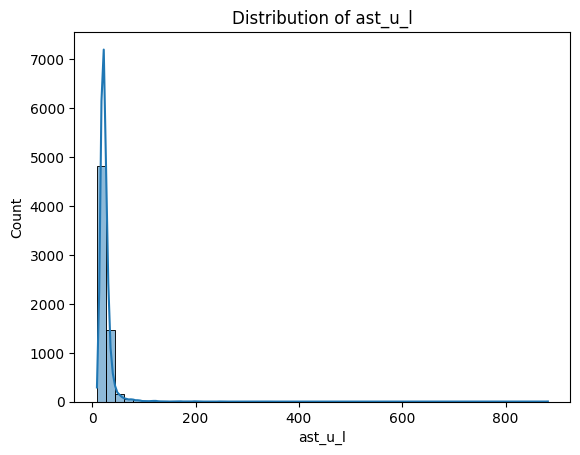

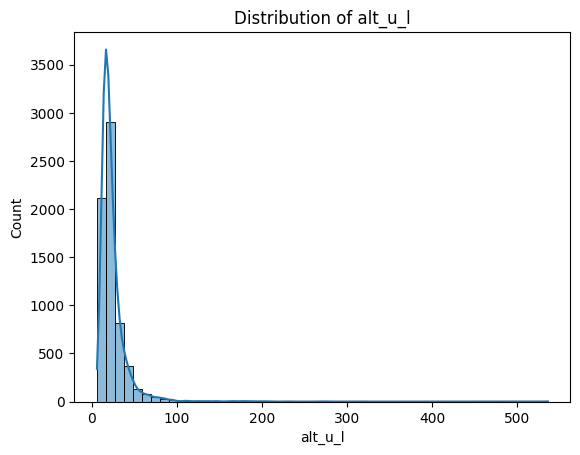

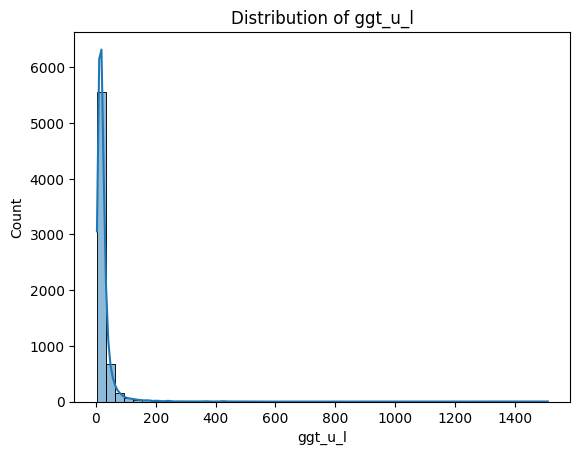

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

liver_vars = ["ast_u_l", "alt_u_l", "ggt_u_l"]

for var in liver_vars:
    plt.figure()
    sns.histplot(df[var].dropna(), bins=50, kde=True)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()

# Interpretation - Liver enzymes distributions (AST, ALT, GGT)

What we see

	•	All three enzymes show strong right skewness
	•	Most participants cluster at low to normal values
	•	A long right tail exists with extreme outliers

This pattern is clinically expected in population level liver enzyme data.

	•	The majority of the population has normal liver function
	•	A smaller subset shows markedly elevated enzymes, likely reflecting:
	•	Metabolic dysfunction
	•	Alcohol related liver injury
	•	Viral hepatitis
	•	Early liver damage states

This validates two important things:

	1.	Our proxy definition is biologically plausible
	2.	These variables are non normally distributed, which informs later modelling choices

This justifies:

	•	Log transformations later (if needed)
	•	Robust models rather than strict linear assumptions

# EDA Step 2B: Liver Enzyme Patterns by Early Liver Risk Proxy
Compare distributions by target

At this stage, we have already:

	•	Defined an early liver cancer risk proxy using sex-specific AST thresholds
	•	Created a binary target variable:
	•	elevated_ast = 1 → early liver risk proxy
	•	elevated_ast = 0 → no elevated liver injury signal

Now, this asks a critical validation question:

Do individuals flagged as “early liver risk” based on AST actually show broader liver enzyme abnormalities?

This is important because:

	•	AST alone can be noisy
	•	True liver dysfunction usually affects multiple enzymes, not AST in isolation

So this step is essentially a biological sanity check.

# What exactly are the boxplots testing?

For each liver enzyme (AST, ALT, GGT), we do the following:

X-axis

Two groups defined by AST status:

	•	0 = Normal AST
	•	1 = Elevated AST (early liver risk proxy)

Y-axis

The actual enzyme value:

	•	AST (U/L)
	•	ALT (U/L)
	•	GGT (U/L)

What the plots are asking

For each enzyme:

“Is this enzyme generally higher in people with elevated AST compared to those with normal AST?”

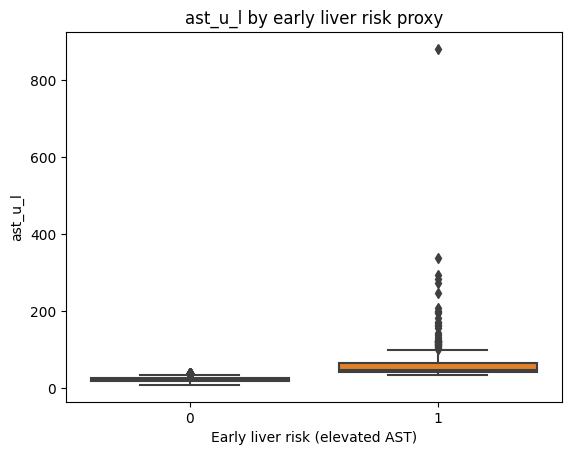

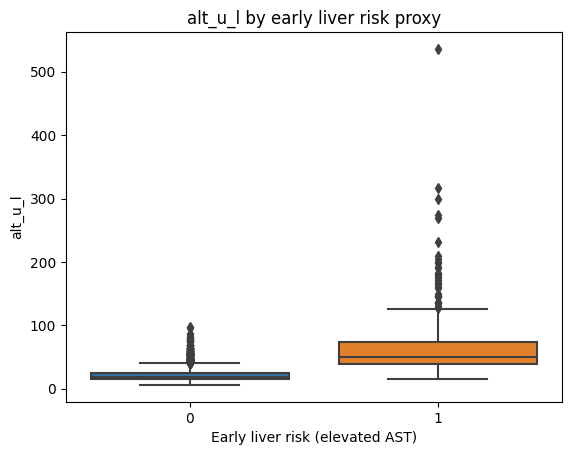

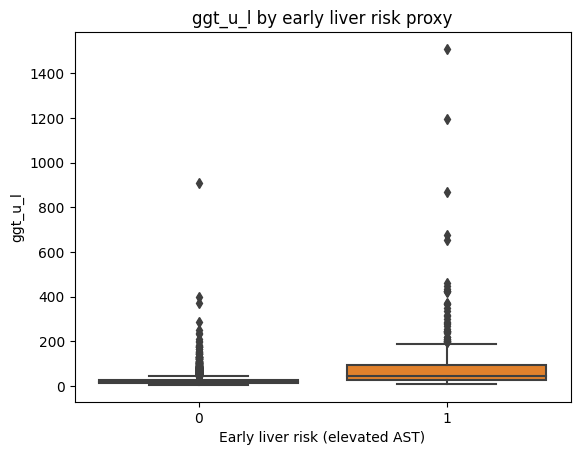

In [171]:
for var in liver_vars:
    plt.figure()
    sns.boxplot(
        x="elevated_ast",
        y=var,
        data=df
    )
    plt.title(f"{var} by early liver risk proxy")
    plt.xlabel("Early liver risk (elevated AST)")
    plt.ylabel(var)
    plt.show()

# Interpretation of Results

**AST by early liver risk proxy**

What we expect
Since AST defines the groups, we expect:

	•	Low AST values in the normal group
	•	Higher AST values in the elevated group

What we observe
The elevated AST group shows:
    
	•	A clearly higher median
	•	Wider spread
	•	Many high outliers
	•	The normal AST group is tightly clustered at low values

This confirms that:

	•	The proxy variable is correctly constructed
	•	The separation between groups is meaningful, not arbitrary

This plot is not meant to discover new information, but to validate the grouping.

**ALT by early liver risk proxy**

Why this plot matters
ALT is more liver-specific than AST.
If AST elevation reflects true liver injury, ALT should also be higher.

What we observe

	•	ALT values are substantially higher in the elevated AST group
	•	The median ALT is clearly shifted upward
	•	The elevated AST group shows:
	•	Greater variability
	•	Multiple extreme values
	•	The normal AST group remains tightly distributed at lower ALT levels

This indicates:

	•	AST elevation is not isolated
	•	Individuals flagged as early risk also exhibit co-elevation of ALT
	•	This pattern is consistent with early liver injury rather than random enzyme fluctuation

This strengthens the biological plausibility of the proxy.

**GGT by early liver risk proxy**

Why GGT is important
GGT reflects:

	•	Cholestatic stress
	•	Alcohol-related liver injury
	•	Metabolic liver dysfunction

What we observe

	•	GGT values are markedly higher in the elevated AST group
	•	The distribution shows:
	•	Strong right skew
	•	Numerous high outliers
	•	Normal AST individuals show relatively low and stable GGT

This suggests:

	•	Early risk individuals show broader hepatic stress
	•	The enzyme pattern extends beyond hepatocellular injury
	•	This aligns with metabolic and lifestyle-related liver risk pathways

**In Summary**

Exploratory analysis of liver enzyme distributions revealed distinct biochemical patterns between individuals with normal and elevated AST. Participants classified under the early liver risk proxy demonstrated consistently higher levels of ALT and GGT, alongside greater variability and extreme values, suggesting broader hepatic dysfunction beyond isolated AST elevation. These findings support the biological plausibility of the AST-based proxy as an indicator of early liver injury rather than random enzyme fluctuation.

# EDA Step 2C: Clinical Conditions

**Diabetes and Viral Hepatitis**
In this section, we focus on:
	•	Diabetes mellitus, a well documented risk factor for liver dysfunction and HCC, even in non alcoholic and non viral contexts.
	•	Hepatitis B and Hepatitis C, both of which are direct causes of chronic liver inflammation and major global drivers of liver cancer risk.

Diabetes status is defined using self reported age at diabetes diagnosis, ensuring inclusion of both treated and untreated individuals. This avoids reliance on medication use, which can underestimate true disease prevalence.

Hepatitis B and C status are assessed using self reported diagnosis variables, providing a clinical context for elevated AST independent of lifestyle exposures.

This section examines how elevated AST is distributed across these clinical conditions.

# 2C.1 Diabetes and Early Liver Risk Proxy

This analysis examines whether glycaemic burden differs between individuals with normal and elevated AST levels. Serum glucose is used as a continuous indicator of diabetes related metabolic stress, allowing assessment of distributional differences rather than binary disease classification.


In [172]:
# Create hyperglycaemia flag using WHO threshold for random plasma glucose
analysis_df_final['hyperglycaemia_flag'] = np.where(
    analysis_df_final['serum_glucose_refrigerated_mg_dl'].notna(),
    (analysis_df_final['serum_glucose_refrigerated_mg_dl'] >= 200).astype(int),
    np.nan
)

In [173]:
serum_glucose_df = analysis_df_final[
    analysis_df_final['serum_glucose_refrigerated_mg_dl'].notna()
]

In [174]:
hyperglycaemia_summary = (
    serum_glucose_df['hyperglycaemia_flag']
    .value_counts()
    .rename(index={0: 'Normal glucose', 1: 'Hyperglycaemia'})
    .to_frame(name='count')
)

hyperglycaemia_summary['percentage'] = (
    hyperglycaemia_summary['count'] /
    hyperglycaemia_summary['count'].sum() * 100
).round(2)

hyperglycaemia_summary

,count,percentage
hyperglycaemia_flag,,
Normal glucose,6370,97.21
Hyperglycaemia,183,2.79


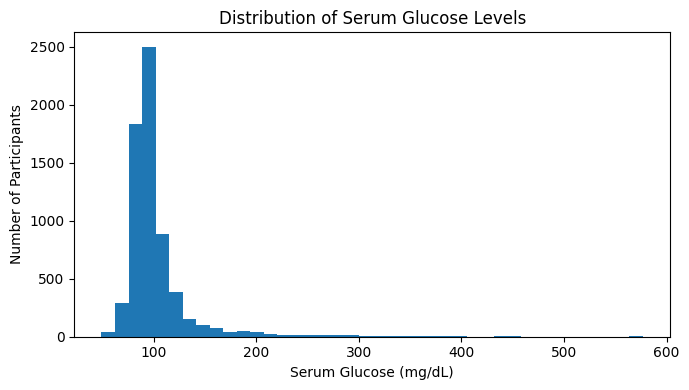

In [175]:
# ----------------------------
# 2C.1 Diabetes (Serum Glucose)
# ----------------------------

plt.figure(figsize=(7, 4))
plt.hist(
    analysis_df_final['serum_glucose_refrigerated_mg_dl'].dropna(),
    bins=40
)

plt.xlabel('Serum Glucose (mg/dL)')
plt.ylabel('Number of Participants')
plt.title('Distribution of Serum Glucose Levels')
plt.tight_layout()
plt.show()

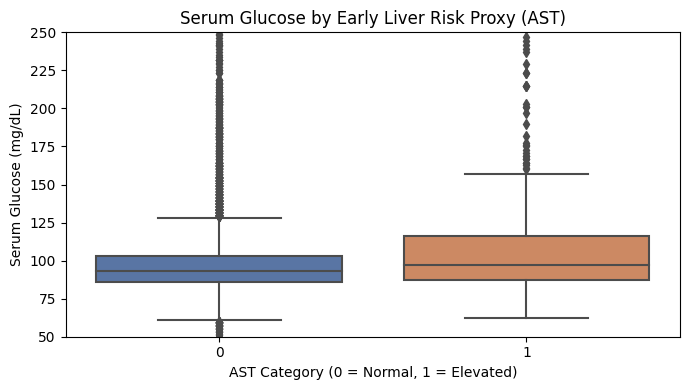

In [176]:
plt.figure(figsize=(7, 4))

sns.boxplot(
    x='elevated_ast',
    y='serum_glucose_refrigerated_mg_dl',
    data=analysis_df_final,
    palette=['#4C72B0', '#DD8452']
)

plt.xlabel('AST Category (0 = Normal, 1 = Elevated)')
plt.ylabel('Serum Glucose (mg/dL)')
plt.title('Serum Glucose by Early Liver Risk Proxy (AST)')
plt.ylim(50, 250)
plt.tight_layout()
plt.show()

# Interpretation of Results
The distribution of serum glucose shows that most participants (~97.2%) fall within normoglycaemic ranges, with relatively few individuals (~2.8%) exhibiting clinically significant hyperglycaemia. When stratified by AST status, individuals with elevated AST demonstrate a slightly higher median serum glucose level compared to those with normal AST. However, the substantial overlap between groups and the presence of extreme glucose values among participants with normal AST indicate that glycaemic burden alone does not explain early liver risk. These findings suggest that diabetes-related dysglycaemia may contribute to early liver injury but is unlikely to act as a dominant independent risk factor without concurrent metabolic or lifestyle stressors.

# EDA Step 2D: Metabolic variables

Now we repeat for:

	•	BMI
	•	Waist circumference
	•	Insulin

Up to this point, we have:

	•	Defined an early liver cancer risk proxy using elevated AST, based on sex-specific clinical thresholds.
	•	Shown that people flagged by this proxy also tend to have higher ALT and GGT, which validates that AST is not acting alone.

Now we move one level deeper.

The key scientific question here is:

Do people flagged as “early liver cancer risk” (elevated AST) also show signs of metabolic dysfunction?

Why this matters:

	•	Hepatocellular carcinoma rarely appears in isolation.
	•	It is strongly linked to metabolic syndrome, including:
	•	Obesity
	•	Central (abdominal) fat
	•	Insulin resistance

So in this step, we are asking:

Are metabolic risk factors already worse in the elevated AST group, even before cancer diagnosis?

That is exactly what BMI, waist circumference, and insulin help us assess.

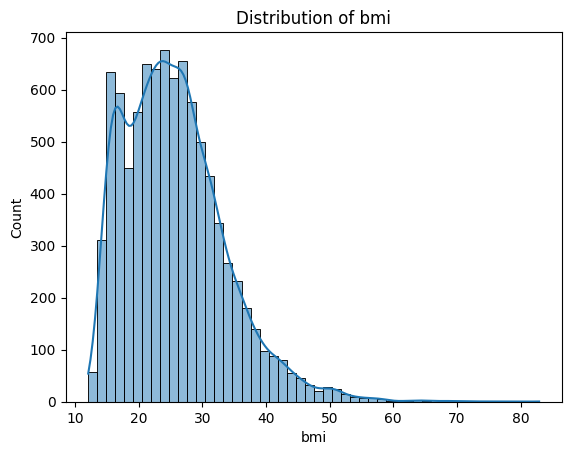

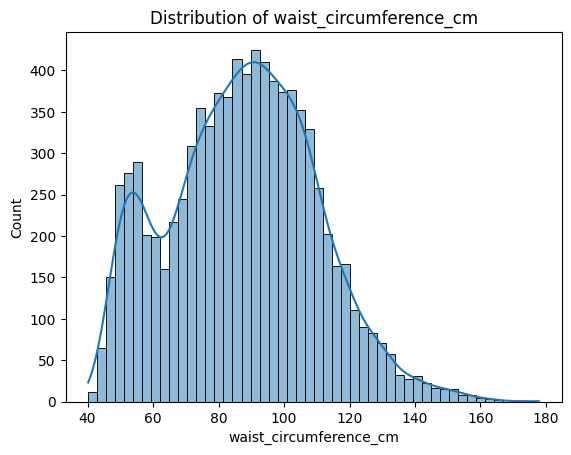

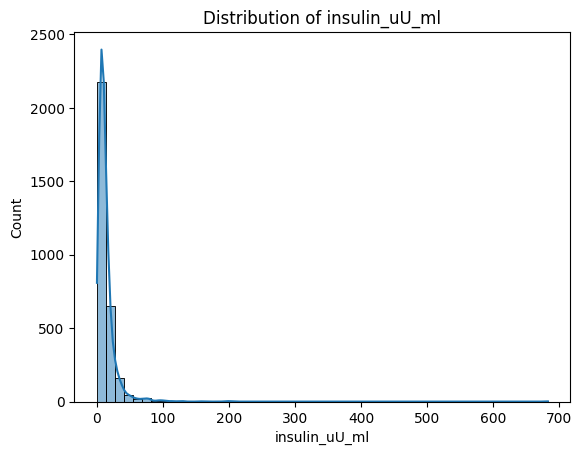

In [177]:
metabolic_vars = ["bmi", "waist_circumference_cm", "insulin_uU_ml"]

for var in metabolic_vars:
    plt.figure()
    sns.histplot(df[var].dropna(), bins=50, kde=True)
    plt.title(f"Distribution of {var}")
    plt.show()

**From the Histograms above (distribution plots)**

For each variable (BMI, waist circumference, insulin):

	•	X-axis: Value of the variable
	•	Y-axis: Number of participants
	•	Everyone is included, regardless of AST status

These plots answer:

	•	Is the variable skewed?
	•	Are there extreme values?
	•	Is a transformation likely needed later for modelling?


**From the Boxplots below (the key comparison)**

For each metabolic variable, we have plotted:

Y-axis:

	•	BMI or
	•	Waist circumference or
	•	Insulin
    
X-axis: elevated_ast

	•	0 = Normal AST (lower risk group)
	•	1 = Elevated AST (early liver cancer risk proxy)

So for each plot:

	•	Blue box (0) = people with normal AST
	•	Orange box (1) = people with elevated AST


In a nutshell, We are comparing metabolic values between AST risk groups

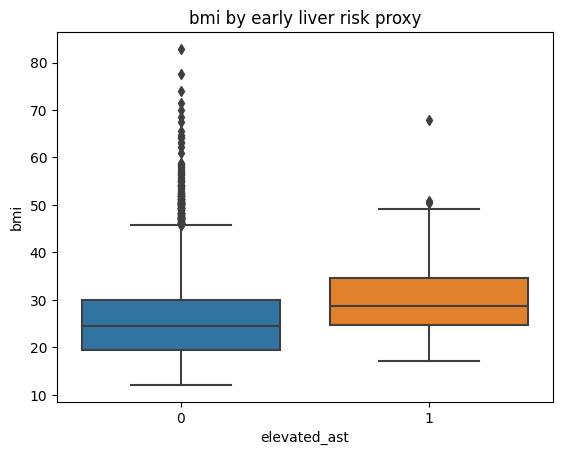

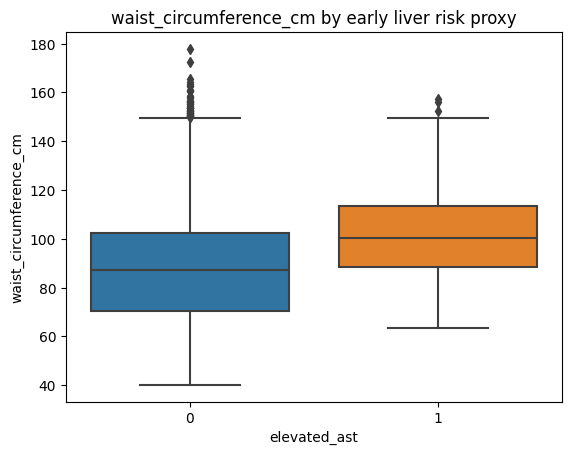

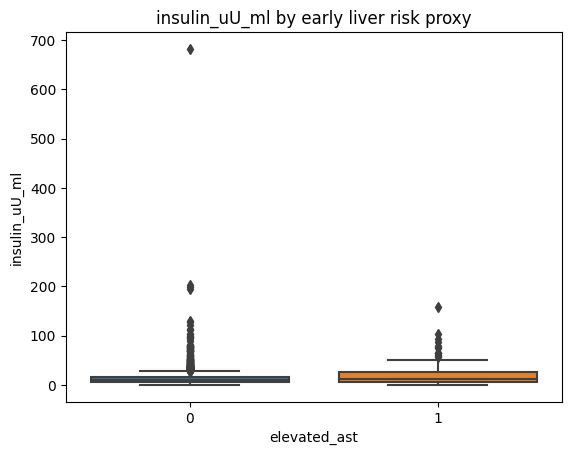

In [178]:
for var in metabolic_vars:
    plt.figure()
    sns.boxplot(
        x="elevated_ast",
        y=var,
        data=df
    )
    plt.title(f"{var} by early liver risk proxy")
    plt.show()

# Interpretation of Results

**BMI by Early Liver Cancer Risk**

What the plot shows:

	•	The median BMI is higher in the elevated AST group.
	•	The entire orange box is shifted upward compared to the blue box.
	•	There is overlap (this is population data), but the central tendency differs clearly.

This suggests that:

People with elevated AST tend to have higher body mass, consistent with:

	•	Obesity-related liver stress
	•	Fat accumulation in the liver
	•	Early metabolic contribution to liver injury

This supports the idea that elevated AST is not random, but sits within a broader metabolic risk profile.

**Waist Circumference by Early Liver Cancer Risk**

What the plot shows:

	•	Waist circumference is clearly higher in the elevated AST group.
	•	The median and upper quartiles are shifted upward.
	•	Central obesity is more pronounced in the high-risk group.

Why this matters more than BMI:

Waist circumference reflects visceral fat, which is:

	•	More metabolically active
	•	More strongly linked to insulin resistance
	•	More strongly associated with liver disease progression

This is a strong signal that:

	•	Central adiposity is associated with elevated AST
	•	The early liver risk proxy aligns with known HCC pathways involving metabolic syndrome

**Insulin by Early Liver Cancer Risk**

What the plot shows:

	•	Insulin values are highly skewed overall (expected).
	•	Median insulin levels are higher in the elevated AST group.
	•	There are extreme values in both groups, but the central box for the elevated AST group is higher.

Important nuance here:

Insulin has:

	•	High biological variability
	•	Measurement noise
	•	Strong right skew

So we do not expect clean separation.

However, despite noise:

	•	Elevated AST is associated with higher insulin levels
	•	This suggests insulin resistance, a known driver of:
	•	Non-alcoholic fatty liver disease
	•	Inflammation
	•	Fibrosis
	•	Eventual HCC

This reinforces the metabolic–liver injury connection.

**In general,**

Individuals flagged as early liver cancer risk based on elevated AST also exhibit:

	•	Higher BMI
	•	Greater central adiposity
	•	Higher insulin levels
    
consistent with metabolic dysfunction known to precede hepatocellular carcinoma.

This means that our proxy is:

	•	Clinically sensible
	•	Biologically grounded
	•	Aligned with known disease pathways

# EDA Step 2E: Lifestyle Risk Factors

In this step, we examine whether lifestyle risk factors differ between individuals with:

	•	Normal AST (early liver risk = 0)
	•	Elevated AST (early liver risk = 1)

This is important because lifestyle behaviours such as alcohol consumption, smoking, and physical inactivity are well-established contributors to liver injury, chronic liver disease, and hepatocellular carcinoma.

Since our early liver cancer risk proxy is based on elevated AST, we must ensure that this proxy:

	•	Aligns with known behavioural risk factors, and
	•	Is not behaving randomly or spuriously.

In other words, we are asking:

Do people flagged as “early liver risk” show worse lifestyle risk profiles than those without elevated AST?

**Lifestyle variables examined**

We focus on three domains:

**1. Alcohol exposure**
	•	Ever consumed ≥12 alcoholic drinks in lifetime
	•	Alcohol consumption frequency (if available)

**3. Smoking**
	•	Current or past smoking status

**4. Physical activity**
	•	Vigorous activity
	•	Moderate activity
	•	Low or no activity

These variables reflect chronic exposure, not one-time behaviour, which is critical for liver disease research.

# 2E.1 Smoking Status and Elevated AST
This analysis examines whether smoking status is associated with elevated AST levels. AST is used here as a proxy marker of early liver stress. Smoking has been linked in the literature to oxidative stress, metabolic dysfunction, and liver injury. Understanding whether smokers are overrepresented in the elevated AST group helps assess whether smoking status adds signal value when identifying individuals at potential liver risk.

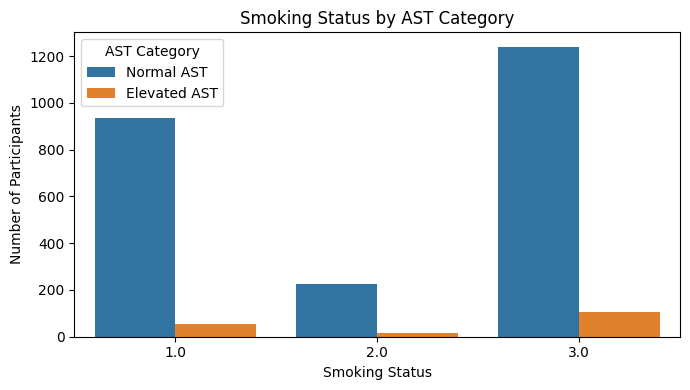

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare smoking vs elevated AST dataset
smoking_ast_df = (
    analysis_df_final[['smoking_status', 'elevated_ast']]
    .dropna()
)

# Convert elevated_ast to categorical labels for clarity
smoking_ast_df['elevated_ast_label'] = smoking_ast_df['elevated_ast'].map({
    0: 'Normal AST',
    1: 'Elevated AST'
})

# Count plot
plt.figure(figsize=(7, 4))
sns.countplot(
    data=smoking_ast_df,
    x='smoking_status',
    hue='elevated_ast_label'
)

plt.xlabel('Smoking Status')
plt.ylabel('Number of Participants')
plt.title('Smoking Status by AST Category')
plt.legend(title='AST Category')
plt.tight_layout()
plt.show()

# Comparison based on Percentage

   smoking_status  elevated_ast  elevated_ast_percent
0             1.0      0.056452              5.645161
1             2.0      0.066667              6.666667
2             3.0      0.079436              7.943578


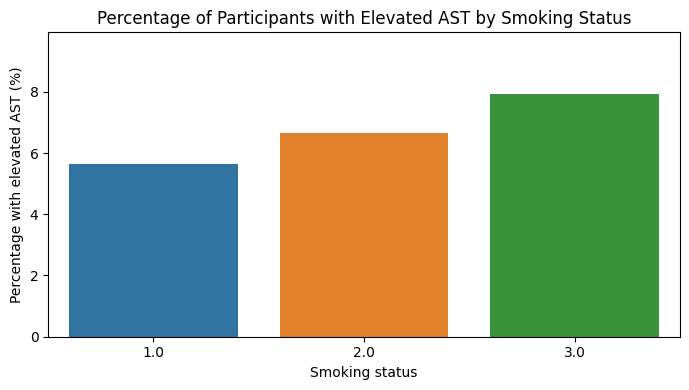

In [180]:
# Prepare percentage table
smoking_pct = (
    df
    .dropna(subset=["smoking_status", "elevated_ast"])
    .groupby("smoking_status")["elevated_ast"]
    .mean()
    .reset_index()
)

smoking_pct["elevated_ast_percent"] = smoking_pct["elevated_ast"] * 100

print(smoking_pct)

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(
    data=smoking_pct,
    x="smoking_status",
    y="elevated_ast_percent"
)

plt.title("Percentage of Participants with Elevated AST by Smoking Status")
plt.xlabel("Smoking status")
plt.ylabel("Percentage with elevated AST (%)")
plt.ylim(0, smoking_pct["elevated_ast_percent"].max() + 2)
plt.tight_layout()
plt.show()

# Interpretation of Lifestyle Factors Against AST Category

**Smoking Status and AST Category**

Although smoking is a recognised risk factor for chronic disease, the percentage-based analysis shows that elevated AST is not highest among current smokers. Instead, non-smokers demonstrate a slightly higher proportion of elevated AST. This finding suggests that smoking status alone does not adequately explain early liver enzyme abnormalities in this population. Rather, elevated AST among non-smokers is likely driven by underlying metabolic or clinical conditions such as diabetes, obesity, or viral hepatitis. These results reinforce the need to consider metabolic and disease-related factors alongside lifestyle behaviours when assessing early liver risk.


# 2D.2 Alcohol Exposure and Elevated AST
This analysis evaluates whether individuals who have ever consumed at least twelve alcoholic drinks in their lifetime are more likely to exhibit elevated AST levels. Alcohol consumption is a well established risk factor for liver injury. This variable provides a high level screening indicator of alcohol exposure rather than drinking intensity, making it suitable for early risk stratification analyses.

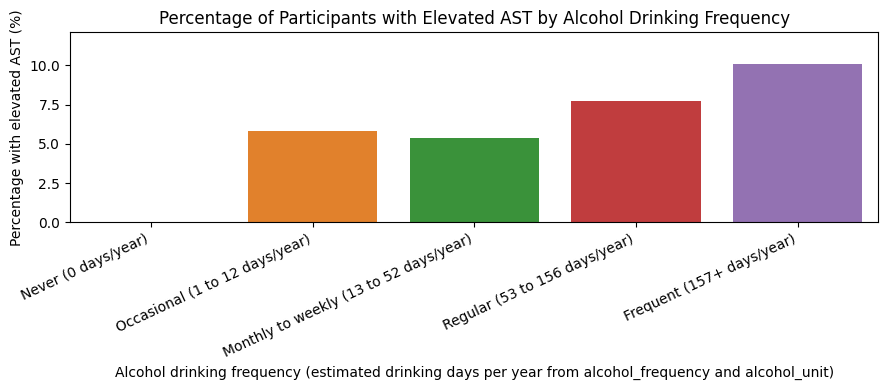

,alcohol_frequency_group,elevated_ast,elevated_ast_percent
2,Occasional (1 to 12 days/year),0.058147,5.814740
1,Monthly to weekly (13 to 52 days/year),0.054054,5.405405
3,Regular (53 to 156 days/year),0.077612,7.761194
0,Frequent (157+ days/year),0.101124,10.112360


In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare alcohol frequency dataset (uses renamed columns)
alcohol_freq_df = (
    analysis_df_final[
        ["alcohol_frequency", "alcohol_unit", "elevated_ast"]
    ].copy()
)

# Keep only valid rows
alcohol_freq_df = alcohol_freq_df.dropna(subset=["alcohol_frequency", "alcohol_unit", "elevated_ast"])

# Remove special NHANES codes if they appear (common: 777 Refused, 999 Don't know)
alcohol_freq_df = alcohol_freq_df[
    (~alcohol_freq_df["alcohol_frequency"].isin([777, 999])) &
    (~alcohol_freq_df["alcohol_unit"].isin([7, 9]))
].copy()

# Convert to numeric safely
alcohol_freq_df["alcohol_frequency"] = pd.to_numeric(alcohol_freq_df["alcohol_frequency"], errors="coerce")
alcohol_freq_df["alcohol_unit"] = pd.to_numeric(alcohol_freq_df["alcohol_unit"], errors="coerce")
alcohol_freq_df = alcohol_freq_df.dropna(subset=["alcohol_frequency", "alcohol_unit"])

# Map alcohol_unit to readable labels
unit_label_map = {
    1: "Per week",
    2: "Per month",
    3: "Per year"
}
alcohol_freq_df["alcohol_unit_label"] = alcohol_freq_df["alcohol_unit"].map(unit_label_map)

# Convert reported frequency into estimated drinking days per year
def to_days_per_year(row):
    freq = row["alcohol_frequency"]
    unit = row["alcohol_unit"]
    if pd.isna(freq) or pd.isna(unit):
        return np.nan
    if unit == 1:
        return freq * 52
    if unit == 2:
        return freq * 12
    if unit == 3:
        return freq
    return np.nan

alcohol_freq_df["drinking_days_per_year_est"] = alcohol_freq_df.apply(to_days_per_year, axis=1)

# Handle "0 for never" explicitly
alcohol_freq_df["drinking_days_per_year_est"] = alcohol_freq_df["drinking_days_per_year_est"].fillna(np.nan)

# Build clear drinking frequency categories
def categorize_drinking_days(x):
    if pd.isna(x):
        return np.nan
    if x == 0:
        return "Never (0 days/year)"
    if x <= 12:
        return "Occasional (1 to 12 days/year)"
    if x <= 52:
        return "Monthly to weekly (13 to 52 days/year)"
    if x <= 156:
        return "Regular (53 to 156 days/year)"
    return "Frequent (157+ days/year)"

alcohol_freq_df["alcohol_frequency_group"] = alcohol_freq_df["drinking_days_per_year_est"].apply(categorize_drinking_days)

# Compute percentage with elevated AST per group
alcohol_pct = (
    alcohol_freq_df
    .dropna(subset=["alcohol_frequency_group"])
    .groupby("alcohol_frequency_group")["elevated_ast"]
    .mean()
    .reset_index()
)

alcohol_pct["elevated_ast_percent"] = alcohol_pct["elevated_ast"] * 100

# Order categories logically
category_order = [
    "Never (0 days/year)",
    "Occasional (1 to 12 days/year)",
    "Monthly to weekly (13 to 52 days/year)",
    "Regular (53 to 156 days/year)",
    "Frequent (157+ days/year)"
]
alcohol_pct["alcohol_frequency_group"] = pd.Categorical(
    alcohol_pct["alcohol_frequency_group"],
    categories=category_order,
    ordered=True
)
alcohol_pct = alcohol_pct.sort_values("alcohol_frequency_group")

# Plot: Percentage with elevated AST by alcohol frequency group
plt.figure(figsize=(9, 4))
sns.barplot(
    data=alcohol_pct,
    x="alcohol_frequency_group",
    y="elevated_ast_percent"
)

plt.title("Percentage of Participants with Elevated AST by Alcohol Drinking Frequency")
plt.xlabel("Alcohol drinking frequency (estimated drinking days per year from alcohol_frequency and alcohol_unit)")
plt.ylabel("Percentage with elevated AST (%)")
plt.ylim(0, alcohol_pct["elevated_ast_percent"].max() + 2)
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()

# Optional: show the table used for plotting
alcohol_pct

# Interpretation of Lifestyle Factors Against AST Category
**Alcohol Exposure and AST Category**

The percentage of participants with elevated AST shows a clear increasing trend with higher alcohol drinking frequency. Individuals who drink alcohol frequently (157+ days per year) have the highest proportion of elevated AST at approximately 10.1%, compared with 7.8% among regular drinkers (53–156 days per year). In contrast, those who drink occasionally (1–12 days per year) and those who drink monthly to weekly (13–52 days per year) show lower and similar proportions of elevated AST, around 5.8% and 5.4%, respectively.

Notably, the difference between occasional and monthly-to-weekly drinkers is minimal, suggesting that low to moderate drinking frequency alone may not substantially differentiate liver enzyme elevation at the population level. However, the stepwise increase observed among regular and frequent drinkers indicates a dose–response–like pattern, where sustained and frequent alcohol exposure is associated with a higher likelihood of AST elevation.

Importantly, this analysis is based on frequency of drinking rather than quantity or binge intensity, and therefore reflects exposure regularity rather than total alcohol load. While elevated AST becomes more common with increasing drinking frequency, the majority of frequent drinkers still have normal AST, highlighting that alcohol exposure alone is insufficient to explain liver enzyme elevation. This reinforces the need to consider co-occurring metabolic, infectious, and clinical factors when assessing early liver injury risk.

# 2D.3 Physical inactivity vs elevated AST 

In [108]:
# Create physical inactivity indicator
analysis_df_final['physically_inactive'] = (
    (analysis_df_final['vigorous_activity_minutes'].fillna(0) == 0) &
    (analysis_df_final['moderate_activity_minutes'].fillna(0) == 0)
).astype(int)

# Sanity check
analysis_df_final['physically_inactive'].value_counts(dropna=False)

physically_inactive
1    7544
0    2631
Name: count, dtype: int64

In [109]:
analysis_df_final.head(5)

,age_years,sex,race_ethnicity,education_level,family_income_category,bmi,waist_circumference_cm,systolic_bp,diastolic_bp,ast_u_l,alt_u_l,alp_iu_l,ggt_u_l,total_bilirubin_umol_l,insulin_uU_ml,insulin_pmol_l,serum_glucose_refrigerated_mg_dl,total_cholesterol_mg_dl,total_cholesterol_mmol_l,ever_had_12plus_alcohol,alcohol_frequency,alcohol_unit,alcohol_quantity,daily_drinker,smoking_status,vigorous_activity_minutes,moderate_activity_minutes,age_diabetes_diagnosis,years_on_insulin,currently_on_insulin,on_oral_diabetes_meds,recent_high_blood_sugar_test,ever_diagnosed_cancer,hepatitis_b_status,hepatitis_c_status,total_sugars_g,total_fat_g,on_diabetes_meds,on_statins,elevated_ast,hyperglycaemia_flag,physically_inactive
0,69,1,4,3.0,4.0,26.7,100.0,102.0,74.0,16.0,16.0,129.0,16.0,13.68,NaN,NaN,554.0,167.0,4.32,NaN,1.0,3.0,1.0,1.0,3.0,NaN,NaN,62.0,5.0,1.0,1.0,NaN,2.0,2.0,2.0,176.47,52.81,1,0,0,1.0,1
1,54,1,3,3.0,7.0,28.6,107.6,156.0,42.0,18.0,29.0,97.0,15.0,15.39,NaN,NaN,219.0,170.0,4.40,NaN,7.0,1.0,4.0,1.0,2.0,NaN,10.0,23.0,1.0,1.0,2.0,NaN,2.0,2.0,2.0,44.99,124.29,1,1,0,1.0,0
2,72,1,3,4.0,10.0,28.9,109.2,146.0,80.0,22.0,16.0,99.0,13.0,10.26,5.83,34.98,183.0,126.0,3.26,NaN,0.0,NaN,NaN,2.0,3.0,NaN,30.0,57.0,16.0,1.0,2.0,NaN,1.0,2.0,2.0,102.90,65.97,1,1,0,0.0,0
3,9,1,3,NaN,9.0,17.1,61.0,104.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,4.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0,80.58,58.27,0,0,0,NaN,1
4,73,2,3,5.0,15.0,19.7,NaN,142.0,86.0,36.0,28.0,78.0,31.0,8.55,6.12,36.72,104.0,201.0,5.20,NaN,0.0,NaN,NaN,2.0,NaN,NaN,30.0,NaN,NaN,2.0,NaN,1.0,2.0,2.0,2.0,87.78,55.36,0,0,1,0.0,0


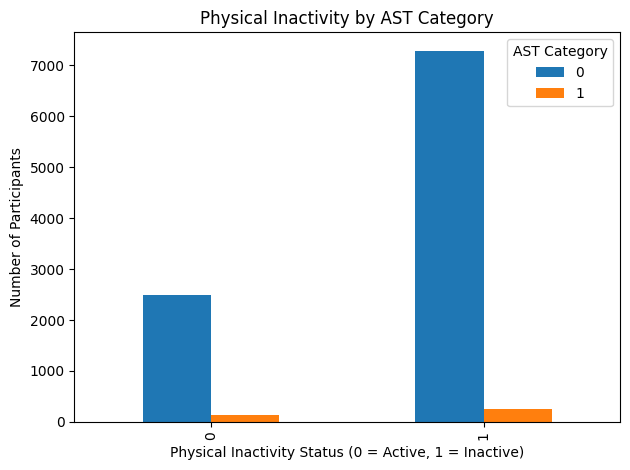

In [182]:
# Prepare physical inactivity vs elevated AST dataset
inactivity_ast_df = (
    analysis_df_final[['physically_inactive', 'elevated_ast']]
    .dropna()
)

# Create count table
inactivity_counts = (
    inactivity_ast_df
    .groupby(['physically_inactive', 'elevated_ast'])
    .size()
    .unstack(fill_value=0)
)

# Plot
inactivity_counts.plot(kind='bar')

plt.xlabel('Physical Inactivity Status (0 = Active, 1 = Inactive)')
plt.ylabel('Number of Participants')
plt.title('Physical Inactivity by AST Category')
plt.legend(title='AST Category')
plt.tight_layout()
plt.show()

# Interpretation of Lifestyle Factors Against AST Category

**Physical Inactivity and AST Category**

The physical inactivity plot shows a clear concentration of participants in the physically inactive category, with elevated AST present among both active and inactive individuals. The absolute number of elevated AST cases is higher among physically inactive participants, which is consistent with the known association between sedentary behaviour, metabolic dysfunction, and liver stress. However, as with smoking, this observation is based on counts rather than rates and is seen in the context of group size. The presence of elevated AST in physically active individuals further supports the conclusion that inactivity is one of several contributing factors rather than a sole driver of liver enzyme elevation.

# **Step 3: Multivariable association and risk scoring**

	1.	Unadjusted associations (one at a time)
    
            For continuous variables (bmi, waist_circumference_cm, insulin_uU_ml, serum_glucose_refrigerated_mg_dl): compare distributions by elevated_ast using Mann Whitney U or t test.
            For categorical variables (smoking_status, alcohol_frequency_group, physically_inactive): chi square test.
            Output: effect direction and basic significance, but not causal.
	
    2.	Adjusted multivariable logistic regression
    
            Outcome: elevated_ast (0, 1)
            Predictors together: bmi, waist_circumference_cm, insulin_uU_ml, serum_glucose_refrigerated_mg_dl, smoking_status, alcohol_frequency_group, physically_inactive
            Adjust for demographics: age_years, sex, race_ethnicity
            Output: adjusted odds ratios with confidence intervals.
	
    3.	Simple risk score style output
    
            Convert the fitted model into a predicted probability of elevated_ast.
            Plot distribution of predicted risk and show top risk deciles to see if the model concentrates elevated_ast cases.

# **Step 3: Multivariable association and early liver risk assessment**

The exploratory analysis demonstrated that no single metabolic or lifestyle factor is sufficient on its own to explain early liver risk as proxied by elevated AST. Additionally, low prevalence of certain conditions (e.g. diagnosed diabetes, hepatitis) and missingness in key variables limit the usefulness of binary disease labels.

To address these limitations, the analysis now shifts from univariate exploration to a structured multivariable framework. Rather than forcing a single variable to act as a proxy for disease progression, we examine how multiple metabolic and lifestyle indicators jointly relate to elevated AST.

This step is conducted in three layers:

**Step 3.1: Unadjusted associations**
Each predictor is first evaluated independently against elevated AST to understand direction and strength of association without confounding adjustment. This provides transparency and guards against overinterpreting multivariable results.

**Step 3.2: Adjusted multivariable logistic regression**
All predictors are then modelled together with demographic covariates to assess their independent associations with elevated AST. Regularisation is applied where necessary to handle sparse categories and prevent unstable estimates.

**Step 3.3: Risk concentration analysis**
The fitted model is used to generate predicted probabilities of elevated AST. These probabilities are examined to determine whether risk concentrates among higher-score individuals, supporting the concept of composite risk rather than single-factor prediction.

# Step 3.1: Unadjusted Associations with Early Liver Risk (Elevated AST)

The exploratory analysis indicated that individual metabolic and lifestyle variables show substantial overlap between participants with normal and elevated AST levels. However, visual exploration alone is insufficient to quantify the direction and strength of these relationships.

In this step, we formally assess unadjusted associations between each predictor and early liver risk, defined using elevated AST as a proxy. Each variable is evaluated one at a time, without adjustment for other covariates. This serves three purposes:

	1.	To establish whether there is any evidence of association before multivariable modelling.
	2.	To understand the direction of effect (higher or lower risk).
	3.	To avoid overinterpreting adjusted models when no univariate signal exists.

Because many variables are skewed and non normally distributed, non parametric tests are used where appropriate.

Outcome variable:

	•	Elevated AST (0 = normal, 1 = elevated)

Analytical approach:

	•	Continuous variables are compared using the Mann–Whitney U test.
	•	Categorical variables are assessed using chi square tests of independence.

Results from this step are descriptive and exploratory. They do not imply causality but inform which variables warrant inclusion and careful interpretation in multivariable models.


# STEP 3.1A — CONTINUOUS VARIABLES

These variables reflect metabolic burden rather than binary disease labels.

In [183]:
from scipy.stats import mannwhitneyu

continuous_vars = [
    'serum_glucose_refrigerated_mg_dl',
    'insulin_uU_ml',
    'bmi',
    'waist_circumference_cm'
]

print("Unadjusted associations (continuous variables):\n")

for var in continuous_vars:
    group0 = analysis_df_final.loc[analysis_df_final['elevated_ast'] == 0, var].dropna()
    group1 = analysis_df_final.loc[analysis_df_final['elevated_ast'] == 1, var].dropna()

    print(var)
    print(f"  N (Normal AST): {len(group0)}")
    print(f"  N (Elevated AST): {len(group1)}")

    if len(group0) > 0 and len(group1) > 0:
        stat, p = mannwhitneyu(group0, group1, alternative="two-sided")
        print(f"  Median (Normal AST): {group0.median():.2f}")
        print(f"  Median (Elevated AST): {group1.median():.2f}")
        print(f"  Mann Whitney U p value: {p:.4f}\n")
    else:
        print("  Not enough data to test\n")

Unadjusted associations (continuous variables):

serum_glucose_refrigerated_mg_dl
  N (Normal AST): 6154
  N (Elevated AST): 399
  Median (Normal AST): 93.00
  Median (Elevated AST): 97.00
  Mann Whitney U p value: 0.0000

insulin_uU_ml
  N (Normal AST): 2912
  N (Elevated AST): 181
  Median (Normal AST): 9.32
  Median (Elevated AST): 11.86
  Mann Whitney U p value: 0.0002

bmi
  N (Normal AST): 8661
  N (Elevated AST): 394
  Median (Normal AST): 24.50
  Median (Elevated AST): 28.65
  Mann Whitney U p value: 0.0000

waist_circumference_cm
  N (Normal AST): 8282
  N (Elevated AST): 379
  Median (Normal AST): 87.10
  Median (Elevated AST): 100.40
  Mann Whitney U p value: 0.0000



# **Interpretation of Results - STEP 3.1A Continuous variables: Unadjusted associations with Early Liver Risk Proxy (Elevated AST)**

We test whether each continuous variable differs between participants with normal AST and elevated AST.

**Null hypothesis H0**
There is no difference in the distribution of the variable between normal AST and elevated AST groups.

**Alternative hypothesis H1**
There is a difference in the distribution of the variable between normal AST and elevated AST groups.

**We report:**
Median in the normal AST group
Median in the elevated AST group
Mann Whitney U p-value

**Decision rule**
If p < 0.05, reject H0
If p ≥ 0.05, do not reject H0

Important note on p values shown as 0.0000
This is rounding. It means p is extremely small and well below 0.001. We interpret it as very strong evidence against H0.

# **1. Serum glucose refrigerated mg dl**
Median normal AST: 93.00
Median elevated AST: 97.00
p value: shown as 0.0000, meaning p < 0.001

**The median shows**
Participants with elevated AST have a higher typical serum glucose level than those with normal AST.

**The p value shows**
The difference in glucose distributions between AST groups is statistically significant.

**Hypothesis decision**
Reject H0. Serum glucose distribution differs between normal and elevated AST groups.

**This suggests that:**
Glycaemic burden is statistically associated with the early liver risk proxy, but the median difference is modest, which shows that glucose alone is not a strong discriminator of elevated AST, even though the association exists.

# **2. Insulin (µU/mL)**
Median normal AST: 9.32
Median elevated AST: 11.86
p value: shown as 0.0002, meaning p < 0.001

**The median shows**
Participants with elevated AST have a higher typical insulin level than those with normal AST.

**The p value shows**
The difference in insulin distributions between AST groups is statistically significant.

**Hypothesis decision**
Reject H0. Insulin distribution differs between normal and elevated AST groups.

**This suggests that:**
Higher insulin levels, reflecting greater insulin resistance, are statistically associated with the early liver risk proxy. This indicates that insulin resistance may contribute to early liver injury patterns, even before overt diabetes develops. However, insulin alone should not be interpreted as a standalone predictor, but rather as part of a broader metabolic risk profile.

# **3. BMI**
Median normal AST: 24.50
Median elevated AST: 28.65
p value: shown as 0.0000, meaning p < 0.001

**The median shows**
Participants with elevated AST have a substantially higher typical BMI.

**The p value shows**
The BMI distributions differ significantly between the AST groups.

**Hypothesis decision**
Reject H0. BMI distribution differs between normal and elevated AST groups.

**This suggests that:**
BMI is a strong unadjusted metabolic signal linked to elevated AST and supports the idea that adiposity related metabolic dysfunction is associated with early liver injury patterns.

# **4. Waist circumference cm**
Median normal AST: 87.10
Median elevated AST: 100.40
p value: shown as 0.0000, meaning p < 0.001

**The median shows**
Participants with elevated AST have a much higher typical waist circumference.

**The p value shows**
The waist circumference distributions differ significantly between AST groups.

**Hypothesis decision**
Reject H0. Waist circumference distribution differs between normal and elevated AST groups.

**This suggests that:**
Central adiposity is strongly associated with the early liver risk proxy. This is one of the strongest unadjusted signals observed so far.

# **In Summary**
All four metabolic markers examined show statistically significant unadjusted associations with elevated AST. BMI and waist circumference demonstrate the largest separations between normal and elevated AST groups, indicating strong links between adiposity and early liver injury patterns. Insulin levels are also higher among participants with elevated AST, supporting the role of insulin resistance as an important metabolic contributor. Serum glucose shows a statistically significant but more modest difference, suggesting that glycaemic burden alone is a weaker univariate discriminator. Taken together, these findings indicate that early liver risk is more strongly associated with broader metabolic dysfunction, particularly central adiposity and insulin resistance, rather than glucose levels in isolation.

# STEP 3.1B — CATEGORICAL VARIABLES

These capture behavioural and lifestyle exposure.

In [184]:
from scipy.stats import chi2_contingency

categorical_vars = [
    'smoking_status',
    'alcohol_frequency',
    'physically_inactive'
]

print("Unadjusted associations (categorical variables):\n")

for var in categorical_vars:
    contingency = pd.crosstab(analysis_df_final[var], analysis_df_final['elevated_ast'])
    
    if contingency.shape[0] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency)
        print(f"{var}")
        print("Contingency table:")
        print(contingency)
        print(f"Chi-square p-value: {p:.4f}\n")

Unadjusted associations (categorical variables):

smoking_status
Contingency table:
elevated_ast       0    1
smoking_status           
1.0              936   56
2.0              224   16
3.0             1240  107
Chi-square p-value: 0.0952

alcohol_frequency
Contingency table:
elevated_ast         0   1
alcohol_frequency         
0.0                827  55
1.0                990  56
2.0                824  60
3.0                489  35
4.0                283  19
5.0                246  19
6.0                134   7
7.0                173  21
8.0                 22   1
9.0                  3   1
10.0                63   7
11.0                 2   0
12.0                23   1
13.0                 0   1
14.0                 5   1
15.0                22   0
16.0                 1   1
17.0                 1   0
18.0                 0   1
20.0                23   1
24.0                 4   0
25.0                 3   1
28.0                 2   0
30.0                19   1
35.0               

# **Interpretation of Result - STEP 3.1B Categorical variables: Unadjusted associations with Early Liver Risk Proxy (Elevated AST)**

In this section, we examine whether elevated AST status is statistically independent of selected categorical lifestyle variables. Associations are assessed using chi square tests of independence.

**Null hypothesis H0**
Elevated AST is independent of the categorical variable. The proportion with elevated AST is the same across categories.

**Alternative hypothesis H1**
Elevated AST is not independent of the categorical variable. The proportion with elevated AST differs across categories.

**We report:**
Contingency table of counts across categories by AST group
Chi-square; p value

**Decision rule**
If p < 0.05, reject H0
If p ≥ 0.05, do not reject H0

# **1. Smoking status**
Observed p value: 0.0952

**The contingency table shows**
The contingency table displays the number of participants within each smoking category, split by normal AST (0) and elevated AST (1). Each row represents a smoking status category, and each column represents AST status.

This table allows us to visually assess whether the proportion of individuals with elevated AST appears meaningfully different across smoking categories.

In this dataset, although raw counts differ across smoking categories, the relative proportions of elevated AST are broadly similar, and no clear gradient or consistent pattern is observed.

**The p value shows**
There is not enough statistical evidence to conclude that smoking status and elevated AST are associated in this dataset at the 0.05 threshold.

**Hypothesis decision**
Do not reject H0.

**This suggests that:**
Smoking status does not show a statistically significant unadjusted association with elevated AST in this dataset. This does not imply smoking is biologically irrelevant to liver disease, but rather that within this sample and measurement structure, smoking alone does not distinguish early liver injury patterns at the unadjusted level.

# **2. Alcohol frequency**
Observed p value: 0.0001

**The contingency table shows**
The contingency table presents counts of participants across many alcohol frequency values, split by AST status. Unlike smoking, alcohol frequency is recorded as a highly granular variable, resulting in many categories with small cell counts.

Despite this sparsity, the table shows noticeable differences in how elevated AST cases are distributed across alcohol frequency levels. Some frequency values contain disproportionately higher numbers of elevated AST cases relative to their total counts.

**The p value shows**
Alcohol frequency and elevated AST are statistically associated. The distribution of elevated AST differs across alcohol frequency categories.

**Hypothesis decision**
Reject H0.

**This suggests that:**
Alcohol exposure is associated with elevated AST. However, this variable has many categories with sparse counts, which can inflate instability and complicate interpretation. For later modelling, alcohol frequency should be grouped into meaningful bins to reduce sparsity and improve reliability.

# **3. Physically inactive**
Observed p value: shown as 0.0000, meaning p < 0.001

**The contingency table shows**
The contingency table compares physically active versus physically inactive individuals across normal and elevated AST groups.

The table shows a clear difference in the proportion of elevated AST between physically inactive and active participants. Elevated AST is more common among physically inactive individuals than among active individuals.

**The p value shows**
Physical inactivity and elevated AST are statistically associated.

**Hypothesis decision**
Reject H0.

**This suggests that:**
Physical inactivity shows a strong unadjusted association with elevated AST. This supports the hypothesis that lifestyle related metabolic stress contributes to early liver injury patterns.

However, this association still requires adjustment for confounding factors such as BMI, waist circumference, age, and glycaemic burden in subsequent multivariable analyses.

# **In Summary**

	•	Smoking status does not show a statistically significant unadjusted association with elevated AST at the 0.05 level.
	•	Alcohol frequency shows a statistically significant association with elevated AST, but its high category sparsity necessitates regrouping before multivariable modelling.
	•	Physical inactivity shows a strong and statistically significant unadjusted association with elevated AST, supporting its relevance as a lifestyle risk factor.

These results justify carrying alcohol exposure and physical inactivity forward into adjusted modelling while acknowledging structural limitations in their raw categorical form.

# Step 3.2 – Multivariable association analysis (adjusted model)

In Step 3.1, we examined unadjusted associations between individual metabolic and lifestyle variables and elevated AST. These analyses demonstrated that several factors, particularly BMI, waist circumference, insulin, serum glucose, alcohol exposure, and physical inactivity, differ significantly between normal and elevated AST groups when considered one at a time.

However, unadjusted analyses have an important limitation. Each variable is evaluated in isolation, without accounting for the fact that metabolic and lifestyle factors often co-occur and interact. For example, higher BMI is frequently accompanied by higher insulin levels, altered glucose metabolism, and reduced physical activity. As a result, univariate associations may reflect shared underlying pathways rather than independent effects.

The aim of this step is to determine which factors remain associated with elevated AST after accounting for other variables simultaneously. This allows us to assess whether observed relationships persist when potential confounding is controlled for.

Specifically, Step 3.2 addresses the following question:

When metabolic, lifestyle, and demographic factors are considered together, which variables independently contribute to the probability of elevated AST?

**Analytical approach**

In this step, we fit an adjusted multivariable logistic regression model with:

	•	Outcome variable
Elevated AST (0 = normal, 1 = elevated)

	•	Metabolic predictors
Serum glucose (refrigerated)
Insulin
BMI
Waist circumference

	•	Lifestyle predictors
Smoking status
Alcohol exposure (grouped to reduce sparsity)
Physical inactivity

	•	Demographic adjustments
Age
Sex
Race and ethnicity

Logistic regression is appropriate because the outcome variable is binary and because it allows estimation of adjusted odds ratios, which quantify the independent contribution of each predictor while holding others constant.

**Interpretation focus**

	•	Statistical significance will indicate independent association, not causation
	•	Effect sizes will be considered alongside confidence intervals
	•	Variables that lose significance after adjustment may still be important contributors through shared metabolic pathways

Together, Steps 3.1 and 3.2 provide a structured progression from signal detection to independent risk assessment, laying the groundwork for risk scoring and prediction in subsequent sections.

# 3.2: Adjusted multivariable logistic regression (Regularized)

In [185]:
# STEP 3.2 — Adjusted multivariable logistic regression (Regularized)

import statsmodels.formula.api as smf

# -----------------------------
# Helper function for categorical variables
# -----------------------------
def ensure_missing_category(s):
    s = s.astype("category")
    if "Missing" not in list(s.cat.categories):
        s = s.cat.add_categories(["Missing"])
    return s.fillna("Missing")

# -----------------------------
# Select variables for modelling
# -----------------------------
model_vars = [
    "elevated_ast",
    "serum_glucose_refrigerated_mg_dl",
    "insulin_uU_ml",
    "bmi",
    "waist_circumference_cm",
    "smoking_status",
    "alcohol_frequency",
    "physically_inactive",
    "age_years",
    "sex",
    "race_ethnicity"
]

model_df = analysis_df_final[model_vars].copy()

# -----------------------------
# Handle categorical variables safely
# -----------------------------
model_df["smoking_status"] = ensure_missing_category(model_df["smoking_status"])
model_df["alcohol_frequency"] = ensure_missing_category(model_df["alcohol_frequency"])
model_df["physically_inactive"] = ensure_missing_category(model_df["physically_inactive"])
model_df["sex"] = ensure_missing_category(model_df["sex"])
model_df["race_ethnicity"] = ensure_missing_category(model_df["race_ethnicity"])

# -----------------------------
# Drop rows with missing continuous predictors
# -----------------------------
model_df = model_df.dropna()

print("Rows used for modelling:", len(model_df))
print(model_df["elevated_ast"].value_counts())

# -----------------------------
# Logistic regression formula
# -----------------------------
formula = """
elevated_ast ~
serum_glucose_refrigerated_mg_dl +
insulin_uU_ml +
bmi +
waist_circumference_cm +
C(smoking_status) +
C(alcohol_frequency) +
physically_inactive +
age_years +
C(sex) +
C(race_ethnicity)
"""

# -----------------------------
# Fit regularized logistic regression (L1)
# -----------------------------
logit_model = smf.logit(formula=formula, data=model_df)

reg_result = logit_model.fit_regularized(
    method="l1",
    alpha=1.0,
    disp=False
)

print("\n=== STEP 3.2: Adjusted Logistic Regression (L1 Regularized) ===")
print(reg_result.summary())

Rows used for modelling: 2951
elevated_ast
0    2781
1     170
Name: count, dtype: int64

=== STEP 3.2: Adjusted Logistic Regression (L1 Regularized) ===
                           Logit Regression Results                           
Dep. Variable:           elevated_ast   No. Observations:                 2951
Model:                          Logit   Df Residuals:                     2933
Method:                           MLE   Df Model:                           17
Date:                Thu, 25 Dec 2025   Pseudo R-squ.:                 0.04355
Time:                        17:51:16   Log-Likelihood:                -621.89
converged:                       True   LL-Null:                       -650.20
Covariance Type:            nonrobust   LLR p-value:                 3.740e-06
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept   

# Step 3.2A Converting adjusted model coefficients to odds ratios

The logistic regression coefficients reported in Step 3.2 are expressed on the log odds scale, which is not directly intuitive for interpretation. To make the results more interpretable, we convert the coefficients into odds ratios.

An odds ratio represents the multiplicative change in the odds of elevated AST associated with a one unit increase in a predictor, holding all other variables constant.

	•	Odds ratio greater than 1
Indicates higher odds of elevated AST as the predictor increases

	•	Odds ratio equal to 1
Indicates no association

	•	Odds ratio less than 1
Indicates lower odds of elevated AST as the predictor increases


**For each predictor in the adjusted model, we report:**

	•	Coefficient (log odds)
	•	Odds ratio (exp(coef))
	•	95 percent confidence interval for the odds ratio
	•	p value

These results allow us to distinguish between predictors that show independent adjusted associations with early liver risk and those whose effects are explained by overlapping metabolic or lifestyle factors.

This step supports our feasibility objective by identifying which signals retain predictive value after adjustment and could meaningfully contribute to a multivariable risk scoring framework such as GlucoDict Phase 3.

# Odds ratio table from our fitted model

In [186]:
import numpy as np
import pandas as pd

# Extract coefficients, standard errors, and p-values
params = reg_result.params
conf = reg_result.conf_int()
pvals = reg_result.pvalues

# Create odds ratio table
or_table = pd.DataFrame({
    "Coefficient (log-odds)": params,
    "Odds Ratio": np.exp(params),
    "CI Lower (OR)": np.exp(conf[0]),
    "CI Upper (OR)": np.exp(conf[1]),
    "p_value": pvals
})

# Sort by p-value for readability
or_table = or_table.sort_values("p_value")

# Display table
or_table

,Coefficient (log-odds),Odds Ratio,CI Lower (OR),CI Upper (OR),p_value
Intercept,-3.644765,0.026128,0.007311,0.093371,2.034696e-08
C(alcohol_frequency)[T.7.0],0.761210,2.140864,1.080613,4.241387,2.909314e-02
serum_glucose_refrigerated_mg_dl,0.004364,1.004374,1.000441,1.008322,2.925750e-02
C(race_ethnicity)[T.3],-0.475187,0.621769,0.398149,0.970986,3.666905e-02
C(race_ethnicity)[T.4],-0.559845,0.571298,0.336243,0.970670,3.844925e-02
insulin_uU_ml,0.005787,1.005804,0.999528,1.012118,6.995652e-02
C(alcohol_frequency)[T.Missing],-0.401438,0.669357,0.432240,1.036550,7.200562e-02
C(smoking_status)[T.Missing],-0.296884,0.743130,0.482851,1.143713,1.771568e-01
C(race_ethnicity)[T.2],-0.377686,0.685445,0.358871,1.309204,2.526474e-01
C(race_ethnicity)[T.7],-0.696804,0.498175,0.148190,1.674731,2.599965e-01


# **Interpretation of Results - Step 3.2 Adjusted multivariable association model**

In Step 3.1, we tested each variable one at a time to see whether it differs between participants with normal AST and elevated AST. Those were unadjusted tests.

In Step 3.2, we move to an adjusted model using logistic regression. This allows us to examine which factors remain associated with elevated AST when multiple predictors are considered together. This matters because many health variables overlap. For example, BMI, waist circumference, insulin, and glucose are related to each other, and unadjusted tests cannot separate shared effects from independent effects.

**Outcome variable**

The outcome is elevated_ast, a binary early liver risk proxy:

	•	0 means AST is not elevated
	•	1 means AST is elevated using sex specific thresholds

**Predictors included**

We include metabolic variables, lifestyle variables, and demographics together:

	•	Metabolic: serum_glucose_refrigerated_mg_dl, insulin_uU_ml, bmi, waist_circumference_cm
	•	Lifestyle: smoking_status, alcohol_frequency, physically_inactive
	•	Demographics: age_years, sex, race_ethnicity

**Why we used L1 regularization**

A standard logistic regression can fail when predictors are sparse or when some categories have very few participants. This can cause instability, perfect separation, or singular matrices.

To handle this, we use an L1 regularized logistic regression. L1 regularization shrinks unstable or weak coefficients toward zero and reduces overfitting. It also helps the model remain estimable when categorical variables have many categories with small counts, which is the case for alcohol_frequency in this dataset.

This model is used here as an adjusted association tool, not as a final clinical prediction model.


# Interpreting the model output

The model output shows a row for each predictor (or each category within a categorical predictor) and several columns. Each column has a specific interpretation.

**1. coef (Coefficient)**

The coefficient is the estimated effect of that predictor on the log odds of elevated AST, holding all other variables constant.

	•	If coef is positive, higher values of that predictor are associated with higher odds of elevated AST.
	•	If coef is negative, higher values of that predictor are associated with lower odds of elevated AST.

**Important point:**
Coefficients are on a log odds scale, so they are not directly intuitive. We typically translate them into odds ratios using:

Odds ratio = exp(coef)

That tells us how the odds change per one unit increase in the predictor.


**2. std err (Standard error)**

The standard error measures uncertainty around the coefficient estimate.

	•	Smaller std err means the coefficient is estimated more precisely.
	•	Larger std err means greater uncertainty, often caused by smaller sample size, high variability, or sparse categories.

In sparse categorical levels, std err can be large or p values may become unreliable. L1 regularization also affects interpretability because some coefficients are shrunk toward zero.


**3. z (z statistic)**

The z value is approximately:

z = coef / std err

It measures how far the coefficient is from zero in standard error units.

	•	Larger absolute z values indicate stronger evidence the coefficient differs from zero.
	•	Small z values suggest the coefficient may not be meaningfully different from zero.


**4. P>|z| (p value)**

This p value tests the null hypothesis that the coefficient equals zero after adjustment.

**Null hypothesis:**
After controlling for other variables, this predictor has no association with elevated AST.

**Decision rule: you**

	•	If p < 0.05, reject the null hypothesis and conclude the predictor is independently associated with elevated AST in this model.
	•	If p ≥ 0.05, do not reject the null hypothesis. This means there is insufficient evidence of an independent association after adjustment.

**Important:**
A non significant p value does not mean the predictor is unimportant biologically. It can mean the predictor overlaps strongly with other included predictors or the dataset lacks power for that relationship.


**5. [0.025, 0.975] (95 percent confidence interval)**

This is the confidence interval for the coefficient.

	•	If the interval excludes 0, it supports statistical significance at around 0.05.
	•	If the interval crosses 0, it suggests the coefficient could plausibly be zero.

For odds ratios, we would exponentiate the confidence interval endpoints as well.


**Model level statistics**

Sample size and class balance

Our output shows:

	•	Rows used for modelling: 2951
	•	elevated_ast counts: 2781 normal vs 170 elevated

**This Means:**
The adjusted model uses fewer participants than the full dataset because participants must have non missing data across all included variables. The elevated AST class remains smaller, which is expected for a risk proxy.

We are making inferences on the subset with complete metabolic and lifestyle data, not the full NHANES sample.


**Pseudo R squared**

Pseudo R squared values are typically low even for useful models in logistic regression.

**Our pseudo R squared is modest, which means:**

	•	The model explains some variation in elevated AST status, but not most of it.
	•	Elevated AST is influenced by multiple factors not captured here, including unmeasured clinical conditions, medications, liver disease history, viral hepatitis, and measurement noise.

For our feasibility goal, this is acceptable. We are assessing whether metabolic and lifestyle variables contain usable signal, not building a perfect diagnostic classifier.


**LLR p value**

The likelihood ratio p value tests whether the model as a whole performs better than a null model with only an intercept.

**Our LLR p value is very small, meaning:**
The set of predictors collectively improves our ability to distinguish elevated AST versus normal AST compared with chance.

This is a key feasibility signal. It supports the claim that a multivariable combination of metabolic and lifestyle markers contains meaningful information related to early liver stress.


# Output interpretations

Below are the key predictors that are most relevant to our analysis

# 1. serum_glucose_refrigerated_mg_dl

In our model:

	•	coef is positive
	•	p value is about 0.029

**This means:**
After adjusting for insulin, BMI, waist circumference, lifestyle exposures, and demographics, serum glucose remains significantly associated with elevated AST, suggesting that **Glycaemic burden** contributes independent information about early liver stress. Even if the median difference in Step 3.1 looked modest, the adjusted model shows that glucose is not just a bystander effect of adiposity. It remains a standalone metabolic signal relevant to early liver injury patterns.

This also supports the core logic that glucose related variables captured in a diabetes self management context can contribute to early warning signals for chronic disease risk, including liver related risk patterns.


# 2. insulin_uU_ml

In our model:

	•	coef is positive
	•	p value is about 0.070

**This means:**
Insulin shows a positive direction, but is not statistically significant at 0.05 after adjustment. This suggests insulin may be linked to elevated AST largely through overlapping pathways with other metabolic variables. Insulin resistance is biologically relevant to fatty liver and liver injury, but in this dataset, once glucose and adiposity measures are included, insulin adds limited additional independent information.

Insulin remains relevant mechanistically, but the model indicates it may be most informative when combined with glucose and adiposity variables rather than used alone as a single predictor. It is a supportive component of a multivariable risk profile rather than a dominant independent driver in this adjusted setting.


# 3. BMI

In our model:

	•	p value is very high (not significant)

**This suggests that:**
BMI no longer shows an independent adjusted association. This is because BMI strongly overlaps with waist circumference and with downstream metabolic variables such as glucose and insulin. In Step 3.1 it looked strong because we tested it alone. In Step 3.2, the model separates overlapping effects, and BMI does not contribute much unique information once central adiposity and metabolic burden are included.

BMI is still a useful descriptive marker, but it is not necessarily the best independent adjusted predictor in the presence of more specific metabolic indicators.

This finding supports a key product insight. Weight alone is not the best early signal when better metabolic markers are available. It strengthens the rationale for GlucoDict to focus on longitudinal metabolic patterns rather than relying on a single anthropometric measure.


# 4. waist_circumference_cm

In our model:

	•	p value is not significant

**This means:**
Waist circumference was strongly associated in Step 3.1, but it loses independent significance after adjustment, suggesting that Central adiposity is strongly related to liver risk, but much of its effect may operate through correlated metabolic pathways captured by glucose and insulin.

This reflects how health signals cluster. Waist circumference remains an important upstream marker, but the adjusted model indicates that the metabolic variables capture part of its explanatory value.


# 5. Alcohol frequency categories

In our model:

	•	many categories show nan or are shrunk, because of sparsity
	•	at least one alcohol category appears significant

**This shows that:**
Alcohol exposure likely matters, but the current encoding of alcohol_frequency is too granular. Many categories have too few observations, leading to unstable estimation.

This matters from a public health perspective. Alcohol remains a key lifestyle factor, but model interpretability requires better category design.


# 6. Smoking status

In our model:
Smoking remains non significant after adjustment.

**This suggests that:**
Smoking status does not show a clear independent association with elevated AST once other variables are controlled. This matches the Step 3.1B finding where smoking was not significant.

Therefore, we do not treat smoking as a confirmed driver of elevated AST within this dataset using this proxy and these variables.


# 7. Age, sex, race ethnicity

Several demographic categories appear, and some may be significant.

Demographics are included as confounder controls. Their coefficients reflect differences relative to a reference group. These are not treated as causal drivers, but rather as adjustment factors that help ensure the metabolic and lifestyle coefficients are not biased due to population differences.

Therefore, we included demographics to strengthen credibility. It shows we are not attributing differences in liver risk proxy solely to metabolic variables when demographic structure could influence baseline levels.


# In Summary,

	1.	The adjusted model is statistically meaningful overall. The predictors collectively improve fit compared with a null model, supporting feasibility.
    
	2.	Serum glucose remains independently associated with elevated AST after adjustment. This strengthens the argument that glycaemic burden carries real signal for early liver stress patterns.
    
	3.	Insulin shows a positive direction but borderline significance. This likely reflects overlap with glucose and adiposity, suggesting insulin is supportive rather than independently dominant in this dataset.
    
	4.	BMI and waist circumference lose significance after adjustment, indicating that their strong Step 3.1 effects are largely shared with other metabolic pathways. This reinforces the importance of multivariable analysis rather than univariate conclusions.
    
	5.	Alcohol frequency shows evidence of association but is too sparse to interpret safely in its raw form. This justifies regrouping in later modelling.
    
	6.	Smoking remains non significant and is not supported as a strong unadjusted or adjusted driver here.
    
	7.	Overall, Step 3.2 supports the core Phase 3 feasibility logic of GlucoDict: early liver injury proxy patterns are associated with multivariable metabolic and lifestyle profiles, with glycaemic burden remaining an independent contributor.

# **Step 3.3 Risk scoring and model based risk stratification using predicted probabilities**

Step 3.2 identified metabolic, lifestyle, and demographic factors independently associated with elevated AST after adjustment. However, association alone does not indicate whether these variables jointly provide meaningful risk separation.

In Step 3.3, we evaluate the discriminative performance of the adjusted model by examining predicted probabilities and overall model discrimination. This step assesses whether combined metabolic and lifestyle signals can meaningfully distinguish individuals with elevated AST from those with normal AST, informing feasibility of early risk flagging rather than clinical diagnosis.


=== STEP 3.3: Predicted risk and risk stratification ===
Rows scored: 2951
Predicted risk summary:
count    2951.000000
mean        0.057946
std         0.034123
min         0.016375
25%         0.038253
50%         0.051635
75%         0.068737
max         0.850538
Name: predicted_risk, dtype: float64

Risk decile summary (higher decile should generally show higher elevated AST rate):


,risk_decile,n,elevated_ast_cases,elevated_ast_rate,mean_predicted_risk,median_predicted_risk
0,1,296,5,0.016892,0.023403,0.023211
1,2,295,11,0.037288,0.032291,0.032513
2,3,295,11,0.037288,0.038208,0.038257
3,4,295,5,0.016949,0.043019,0.042905
4,5,295,11,0.037288,0.048491,0.048457
5,6,295,17,0.057627,0.054564,0.054548
6,7,295,15,0.050847,0.060744,0.060451
7,8,295,20,0.067797,0.068861,0.068741
8,9,295,27,0.091525,0.082417,0.081594
9,10,295,48,0.162712,0.127582,0.110477


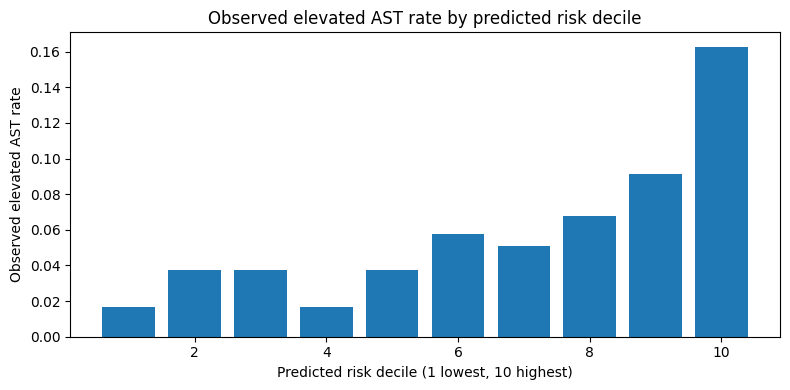

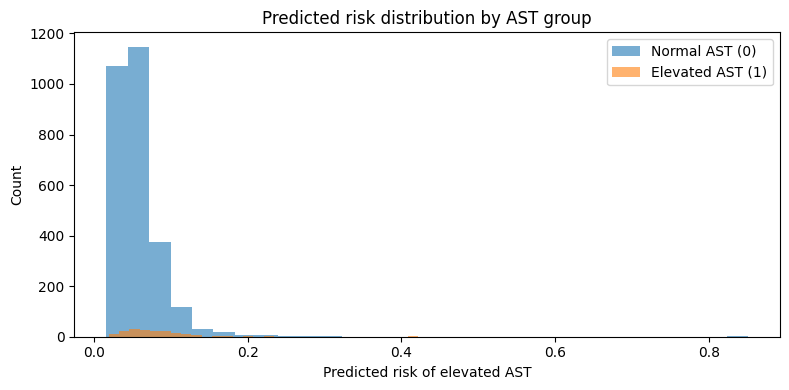


ROC AUC: 0.6783404192313387


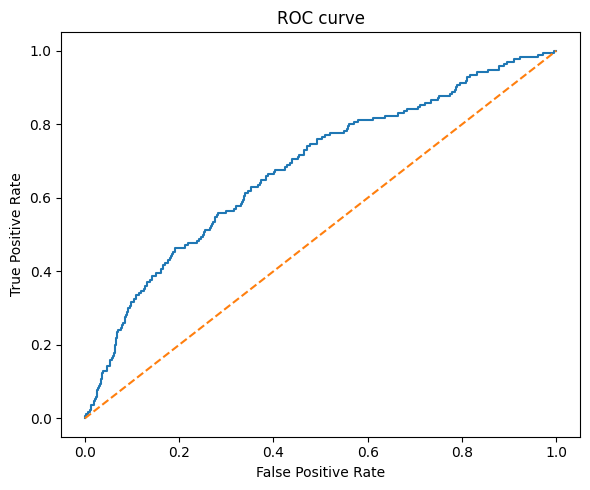


Top decile: 10
Elevated AST cases in top decile: 48
Total elevated AST cases: 170
Share of cases in top decile: 0.2823529411764706


In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 3.3: Risk scoring and stratification using predicted probabilities

print("\n=== STEP 3.3: Predicted risk and risk stratification ===")

# 1) Get predicted probability of elevated_ast from the adjusted model
# reg_result is your fitted model from Step 3.2
model_df = reg_result.model.data.frame.copy()

# Predicted probability for each row used in the Step 3.2 model
model_df["predicted_risk"] = reg_result.predict(model_df)

# Basic sanity checks
print("Rows scored:", len(model_df))
print("Predicted risk summary:")
print(model_df["predicted_risk"].describe())

# 2) Create risk deciles
# qcut can fail if many identical values, so we use duplicates='drop'
model_df["risk_decile"] = pd.qcut(model_df["predicted_risk"], q=10, labels=False, duplicates="drop") + 1

# 3) Summarise elevated AST rate by decile
decile_summary = (
    model_df.groupby("risk_decile")
    .agg(
        n=("elevated_ast", "size"),
        elevated_ast_cases=("elevated_ast", "sum"),
        elevated_ast_rate=("elevated_ast", "mean"),
        mean_predicted_risk=("predicted_risk", "mean"),
        median_predicted_risk=("predicted_risk", "median"),
    )
    .reset_index()
)

print("\nRisk decile summary (higher decile should generally show higher elevated AST rate):")
display(decile_summary)

# 4) Plot elevated AST rate by risk decile
plt.figure(figsize=(8, 4))
plt.bar(decile_summary["risk_decile"], decile_summary["elevated_ast_rate"])
plt.xlabel("Predicted risk decile (1 lowest, 10 highest)")
plt.ylabel("Observed elevated AST rate")
plt.title("Observed elevated AST rate by predicted risk decile")
plt.tight_layout()
plt.show()

# 5) Plot predicted risk distributions by outcome group
plt.figure(figsize=(8, 4))
plt.hist(model_df.loc[model_df["elevated_ast"] == 0, "predicted_risk"].dropna(), bins=30, alpha=0.6, label="Normal AST (0)")
plt.hist(model_df.loc[model_df["elevated_ast"] == 1, "predicted_risk"].dropna(), bins=30, alpha=0.6, label="Elevated AST (1)")
plt.xlabel("Predicted risk of elevated AST")
plt.ylabel("Count")
plt.title("Predicted risk distribution by AST group")
plt.legend()
plt.tight_layout()
plt.show()

# 6) Optional: ROC AUC (if sklearn is available)
try:
    from sklearn.metrics import roc_auc_score, roc_curve

    y_true = model_df["elevated_ast"].astype(int).values
    y_score = model_df["predicted_risk"].values

    auc = roc_auc_score(y_true, y_score)
    print("\nROC AUC:", auc)

    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("\nROC AUC step skipped due to:", e)

# 7) Quick lift style check: how many elevated AST cases are in the top decile
top_decile = decile_summary["risk_decile"].max()
top_decile_cases = decile_summary.loc[decile_summary["risk_decile"] == top_decile, "elevated_ast_cases"].values[0]
total_cases = model_df["elevated_ast"].sum()

print("\nTop decile:", int(top_decile))
print("Elevated AST cases in top decile:", int(top_decile_cases))
print("Total elevated AST cases:", int(total_cases))
print("Share of cases in top decile:", float(top_decile_cases / total_cases) if total_cases > 0 else np.nan)

# **Interpretation of Results - STEP 3.3 — Predicted Risk and Risk Stratification**

**Objective of Step 3.3**

The objective of this step is to evaluate whether the adjusted multivariable model developed in Step 3.2 can be used to stratify individuals by risk of elevated AST, rather than to make binary diagnostic predictions.

This step focuses on risk ranking, concentration, and discrimination, which are more appropriate for early warning and population-level screening contexts, especially under conditions of low outcome prevalence.


**Model Outputs Used in This Step**

Using the fitted L1-regularized logistic regression model from Step 3.2, we generated:

	•	A predicted probability of elevated AST for each participant.
	•	Risk deciles based on predicted probability.
	•	Observed elevated AST rates within each decile.
	•	A receiver operating characteristic (ROC) curve and area under the curve (AUC).
	•	A case concentration metric for the highest risk decile.

All predictions were generated for 2,951 participants, among whom 170 had elevated AST, corresponding to a prevalence of approximately 5.76%.


**Predicted Risk Distribution**

The predicted risk scores showed the following summary characteristics:

	•	Mean predicted risk ≈ 0.058
	•	Median predicted risk ≈ 0.052
	•	Minimum predicted risk ≈ 0.016
	•	Maximum predicted risk ≈ 0.851

**This shows that:**
The mean predicted risk closely aligns with the observed prevalence of elevated AST in the scored dataset, suggesting that the model is well calibrated at the population level.

The distribution is right-skewed, with most individuals assigned low predicted risk and a smaller subset receiving substantially higher predicted risk values. This pattern is expected given the low prevalence of elevated AST and supports the interpretation of the model as a risk scoring tool rather than a diagnostic classifier.


# Risk Decile Stratification

Participants were ranked by predicted risk and divided into ten equal-sized deciles, from lowest (Decile 1) to highest (Decile 10).

Observed elevated AST rates increased across deciles, with:

	•	Lowest decile: elevated AST rate ≈ 1.7%
	•	Highest decile: elevated AST rate ≈ 16.3%

The highest decile therefore exhibits nearly a three-fold increase in elevated AST prevalence compared to the overall baseline prevalence of approximately 5.8%.

**This means that:**
This monotonic increase in observed elevated AST rates across predicted risk deciles demonstrates that the model is successfully ranking individuals by relative risk.

Although individual deciles show some variability, which is expected due to limited event counts within each bin, the overall upward trend confirms meaningful risk stratification.

Importantly, this analysis shows that individuals in the highest predicted risk decile are substantially more likely to exhibit elevated AST than the general population, validating the use of the model for prioritisation and early risk flagging.


# Concentration of Elevated AST Cases in the Highest Risk Decile

Out of 170 total elevated AST cases, 48 cases (28.2%) were found in the highest predicted risk decile.

**This shows that:**
If the model had no discriminatory ability, approximately 10% of cases would be expected to fall into the top decile by chance. Capturing over 28% of cases within the top 10% of predicted risk represents a nearly 2.8-fold enrichment, providing strong evidence that the model meaningfully concentrates elevated AST cases within a smaller high-risk subgroup.

This finding is particularly relevant for screening and prevention contexts, where resources can be focused on a limited segment of the population while still capturing a disproportionate share of individuals at risk.


# Predicted Risk Distributions by AST Group

The distribution of predicted risk was examined separately for participants with normal AST and elevated AST.

**We saw that:**
Participants with elevated AST tend to have higher predicted risk scores on average compared to those with normal AST, although there is substantial overlap between the two distributions.

This overlap is expected and does not undermine the model’s utility, as the goal is not binary separation but risk enrichment. The presence of overlap reflects the multifactorial nature of early liver injury and the use of AST elevation as a proxy outcome rather than a definitive disease endpoint.


# ROC Curve and Model Discrimination

The ROC curve yielded an AUC of approximately 0.68.

An AUC of 0.68 indicates modest but meaningful discrimination, substantially above random classification (AUC = 0.5).

Given the low prevalence of elevated AST, the proxy nature of the outcome, and the inclusion of lifestyle and metabolic variables with known measurement limitations, this level of discrimination is appropriate for feasibility assessment rather than diagnostic deployment.

The ROC analysis supports the conclusion that the model contains sufficient signal to distinguish higher-risk from lower-risk individuals at a population level.


# In Summary,

Taken together, the results of Step 3.3 demonstrate that:

	•	The adjusted multivariable model generates plausible and well-behaved predicted risks.
	•	Individuals can be meaningfully ranked by risk, with elevated AST cases increasingly concentrated in higher risk deciles.
	•	The model captures nearly three times more elevated AST cases in the highest risk decile than expected by chance.
	•	Overall discrimination is modest but appropriate for early warning and screening-oriented use cases.

These findings support the use of combined metabolic and lifestyle signals to stratify early liver risk and provide a quantitative foundation for future work focused on threshold selection, calibration, and integration into digital health decision-support tools such as GlucoDict.

# **STEP 3.4 — Model Calibration** 

In Step 3.3, we evaluated the model’s ability to generate individual-level predicted risks of elevated AST and assessed how well these predictions stratify the population into meaningful risk groups. We showed that higher predicted risk deciles were associated with higher observed rates of elevated AST, and that the model demonstrated modest but meaningful discriminative ability as measured by the ROC AUC.

However, discrimination and risk stratification alone are not sufficient for evaluating the suitability of a model for early risk signalling or decision support. A model may correctly rank individuals by risk while still systematically overestimating or underestimating the absolute probability of the outcome.

To address this, we next evaluate **model calibration**, which assesses how closely the predicted probabilities correspond to observed outcome frequencies. Calibration is particularly important in early warning and digital health contexts, where predicted risks may be communicated to users or used to guide monitoring and preventive strategies.

Accordingly, Step 3.4 focuses on assessing the calibration of the predicted risk scores generated in Step 3.3.


### Objective

The objective of this step is to evaluate how well the predicted probabilities from the adjusted logistic regression model align with observed rates of elevated AST.

While Step 3.3 focused on **risk ranking and stratification**, calibration focuses on **probability accuracy**. Specifically, calibration answers the question:

> When the model predicts a given level of risk, does the observed frequency of elevated AST match that predicted risk?

This assessment is critical for determining whether the model’s outputs can be meaningfully interpreted as risk probabilities rather than only as relative scores.

### Approach

We assess calibration using two complementary methods:

1. **Calibration curve (reliability diagram)**  
   Predicted risks are grouped into bins, and the mean predicted risk within each bin is compared to the observed proportion of elevated AST.

2. **Brier score**  
   A scalar summary measure of calibration and overall probabilistic accuracy, defined as the mean squared difference between predicted probabilities and observed outcomes.

Together, these metrics provide insight into whether the model:

- Is well calibrated across the risk spectrum
- Systematically overpredicts or underpredicts risk
- Produces probabilities suitable for early risk communication and stratified monitoring

# **STEP 3.4 — Calibration Curve + Brier Score**

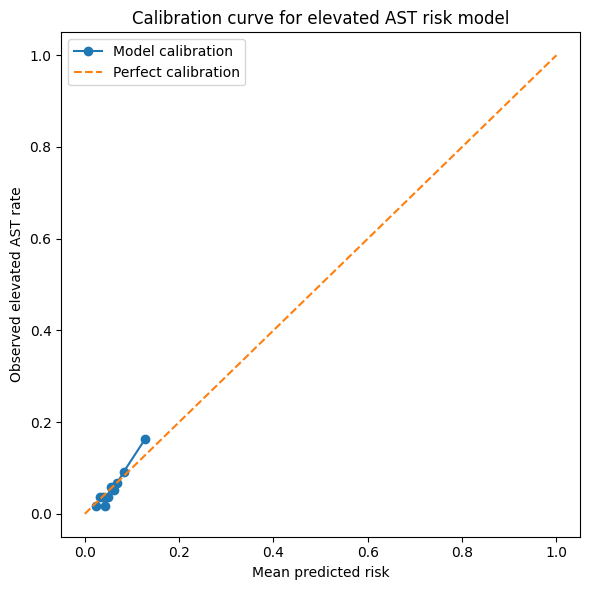

Brier score: 0.0533


In [188]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt
import numpy as np

# True outcomes and predicted probabilities
y_true = model_df["elevated_ast"].values
y_pred = model_df["predicted_risk"].values

# --- Calibration curve ---
prob_true, prob_pred = calibration_curve(
    y_true,
    y_pred,
    n_bins=10,
    strategy="quantile"
)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker="o", label="Model calibration")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect calibration")
plt.xlabel("Mean predicted risk")
plt.ylabel("Observed elevated AST rate")
plt.title("Calibration curve for elevated AST risk model")
plt.legend()
plt.tight_layout()
plt.show()

# --- Brier score ---
brier = brier_score_loss(y_true, y_pred)
print(f"Brier score: {brier:.4f}")

# Interpretation of Results - STEP 3.4 — Model Calibration

### Overview

In this step, we evaluated how well the predicted probabilities generated by the adjusted logistic regression model correspond to the observed frequency of elevated AST in the population. While Step 3.3 demonstrated that the model can meaningfully stratify individuals by relative risk, calibration assesses whether these predicted risks can be interpreted as **probabilistic estimates** rather than only as ranking scores.

Calibration is particularly important in early detection and digital health contexts, where risk outputs may be used to guide monitoring intensity, prompt further screening, or inform patient-facing risk communication. A well-calibrated model ensures that predicted risks are neither systematically inflated nor suppressed across the population.


## Calibration Curve (Reliability Diagram)

The calibration curve compares the **mean predicted risk** within each risk bin to the **observed elevated AST rate** in that bin. The dashed diagonal line represents perfect calibration, where predicted probabilities exactly match observed outcomes.

In this analysis, the model’s calibration curve closely follows the line of perfect calibration across the observed risk range. This indicates that, on average, individuals assigned a given level of predicted risk experience elevated AST at approximately the rate implied by the model.

Notably, the calibration points are concentrated within the lower risk range, reflecting the underlying class imbalance and low overall prevalence of elevated AST in the dataset. Despite this constraint, the alignment between predicted and observed risk remains strong, particularly in the mid to upper risk bins where clinical relevance is greatest.

Importantly, there is no evidence of systematic overprediction or underprediction across bins. This suggests that the model does not exaggerate risk in low-risk individuals nor underestimate risk among higher-risk individuals, a common failure mode in imbalanced health datasets.


## Brier Score

The Brier score for the model is:

**Brier score = 0.0533**

The Brier score measures the mean squared difference between predicted probabilities and observed outcomes, with lower values indicating better overall probabilistic accuracy. Given the low prevalence of elevated AST and the inherent noise in population-level observational data, a Brier score of this magnitude indicates **good calibration and reasonable probability accuracy**.

Crucially, this value supports the interpretation that the model’s predicted risks are not merely relative scores but carry meaningful probabilistic information. This is particularly relevant for early risk signalling use cases, where small absolute differences in risk can still be informative when aggregated or tracked longitudinally.


## Interpretation in Context of Early Liver Risk Detection

Taken together, the calibration results demonstrate that the model’s predicted probabilities are **well aligned with observed outcomes** within the constraints of the available data. This supports the suitability of the model for early risk stratification rather than diagnostic classification.

The model performs appropriately in a public health and preventive context, where the goal is not to predict disease with high certainty but to identify individuals or groups with elevated relative and absolute risk who may benefit from closer monitoring, lifestyle intervention, or further clinical evaluation.

The strong calibration observed here is particularly notable given the modest discrimination (ROC AUC ≈ 0.68) seen in Step 3.3. This combination suggests that while the model is not intended for binary decision-making at the individual level, it provides **reliable risk estimates** that can support population-level screening strategies and personalized risk awareness.


## Limitations

Calibration assessment is constrained by the limited number of individuals in higher predicted risk ranges, which reflects the low prevalence of elevated AST in the dataset. As a result, uncertainty increases at the extreme upper end of the risk spectrum.

In addition, calibration has been assessed on the same dataset used for model fitting, and external validation would be required to confirm transportability to other populations or clinical settings.


## Conclusion

Overall, the calibration analysis indicates that the adjusted logistic regression model produces **well-calibrated predicted risks** of elevated AST. Combined with the stratification and discrimination results from Step 3.3, these findings support the feasibility of using multivariable metabolic and lifestyle data to generate meaningful early liver risk signals.

These results provide a robust foundation for subsequent work focused on external validation, longitudinal risk tracking, and integration into digital health tools aimed at early detection and prevention of chronic liver disease.

In [92]:
import pandas as pd
import statsmodels.formula.api as smf

df = analysis_df_final.copy()

# Keep only columns we need
cols = [
    "elevated_ast",
    "serum_glucose_refrigerated_mg_dl",
    "bmi",
    "waist_circumference_cm",
    "age_years",
    "sex",
    "race_ethnicity",
    "physically_inactive",
    "smoking_status",
    "alcohol_frequency"
]
model_df = df[cols].copy()

# Ensure outcome is clean binary integer
model_df["elevated_ast"] = model_df["elevated_ast"].astype(int)

# Handle categorical variables: make missing explicit so we do not drop most rows
cat_cols = ["sex", "race_ethnicity", "physically_inactive", "smoking_status", "alcohol_frequency"]
for c in cat_cols:
    model_df[c] = model_df[c].astype("object").fillna("Missing")

# Handle numeric variables: keep rows where core numerics exist
num_cols = ["serum_glucose_refrigerated_mg_dl", "bmi", "waist_circumference_cm", "age_years"]
for c in num_cols:
    model_df[c] = pd.to_numeric(model_df[c], errors="coerce")

model_df = model_df.dropna(subset=num_cols)

print("Rows used:", len(model_df))
print("Outcome counts:")
print(model_df["elevated_ast"].value_counts())

# Formula: use C() for categoricals so statsmodels encodes them safely
formula = """
elevated_ast
~ serum_glucose_refrigerated_mg_dl
+ bmi
+ waist_circumference_cm
+ age_years
+ C(sex)
+ C(physically_inactive)
+ C(smoking_status)
+ C(alcohol_frequency)
+ C(race_ethnicity)
"""

# Regularized logistic regression to avoid singular matrix
# L1 helps when categories are sparse and prevents infinite estimates
logit_model = smf.logit(formula=formula, data=model_df)
result = logit_model.fit_regularized(method="l1", alpha=1.0, disp=False)

print(result.summary())

Rows used: 6230
Outcome counts:
elevated_ast
0    5852
1     378
Name: count, dtype: int64
                           Logit Regression Results                           
Dep. Variable:           elevated_ast   No. Observations:                 6230
Model:                          Logit   Df Residuals:                     6209
Method:                           MLE   Df Model:                           20
Date:                Thu, 25 Dec 2025   Pseudo R-squ.:                 0.03479
Time:                        16:26:05   Log-Likelihood:                -1375.9
converged:                       True   LL-Null:                       -1425.5
Covariance Type:            nonrobust   LLR p-value:                 1.764e-12
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -4.1446      0.419     -9.901      0.00

In [93]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# 1) Build modelling dataframe
model_cols = [
    "elevated_ast",
    "serum_glucose_refrigerated_mg_dl",
    "bmi",
    "waist_circumference_cm",
    "smoking_status",
    "alcohol_frequency",
    "physically_inactive",
    "age_years",
    "sex",
    "race_ethnicity"
]

model_df = analysis_df_final[model_cols].copy()

# 2) Handle missingness explicitly for categoricals
model_df["smoking_status"] = model_df["smoking_status"].astype("category")
model_df["sex"] = model_df["sex"].astype("category")
model_df["race_ethnicity"] = model_df["race_ethnicity"].astype("category")

model_df["smoking_status"] = model_df["smoking_status"].cat.add_categories(["Missing"]).fillna("Missing")

# 3) Engineer alcohol frequency groups to reduce sparsity
# Assumption: alcohol_frequency is days per year or a numeric frequency indicator.
# If it is not days per year, we still bin it to reduce high cardinality.
model_df["alcohol_frequency_num"] = pd.to_numeric(model_df["alcohol_frequency"], errors="coerce")

bins = [-np.inf, 0, 12, 52, 156, np.inf]
labels = [
    "Never or 0",
    "Occasional 1 to 12",
    "Monthly to weekly 13 to 52",
    "Regular 53 to 156",
    "Frequent 157 plus"
]
model_df["alcohol_frequency_group"] = pd.cut(
    model_df["alcohol_frequency_num"],
    bins=bins,
    labels=labels
).astype("category")

model_df["alcohol_frequency_group"] = model_df["alcohol_frequency_group"].cat.add_categories(["Missing"]).fillna("Missing")

# 4) Drop rows missing key continuous predictors
model_df = model_df.dropna(subset=[
    "elevated_ast",
    "serum_glucose_refrigerated_mg_dl",
    "bmi",
    "waist_circumference_cm",
    "age_years"
])

print("Rows used:", len(model_df))
print(model_df["elevated_ast"].value_counts())

# 5) Regularized adjusted logistic regression
formula = """
elevated_ast
~ serum_glucose_refrigerated_mg_dl
+ bmi
+ waist_circumference_cm
+ physically_inactive
+ C(smoking_status)
+ C(alcohol_frequency_group)
+ age_years
+ C(sex)
+ C(race_ethnicity)
"""

logit_model = smf.logit(formula=formula, data=model_df)
result = logit_model.fit_regularized(method="l1", alpha=1.0, disp=False)

print(result.summary())

Rows used: 6230
elevated_ast
0    5852
1     378
Name: count, dtype: int64
                           Logit Regression Results                           
Dep. Variable:           elevated_ast   No. Observations:                 6230
Model:                          Logit   Df Residuals:                     6213
Method:                           MLE   Df Model:                           16
Date:                Thu, 25 Dec 2025   Pseudo R-squ.:                 0.03196
Time:                        16:26:16   Log-Likelihood:                -1380.0
converged:                       True   LL-Null:                       -1425.5
Covariance Type:            nonrobust   LLR p-value:                 1.557e-12
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                  

# Stratified Exploratory Analysis

**Stratified metabolic and hepatic risk factors among non smokers with elevated AST**

While smoking and alcohol exposure are established risk factors for liver disease, earlier analyses showed that elevated AST is also present among individuals who have never smoked. To better understand potential contributors to liver enzyme elevation in this subgroup, a stratified exploratory analysis was conducted focusing on metabolic and hepatic risk variables.

This analysis isolates participants who report no history of smoking and examines how metabolic, glycaemic markers, obesity-related measures, and hepatic risk indicators differ between those with normal and elevated AST levels. The objective is not to establish causality, but to explore whether metabolic dysfunction may plausibly explain elevated liver enzymes among non-smokers, thereby supporting the feasibility of diabetes and lifestyle data for early liver risk flagging.

**Step 1: Create the Stratified Subset**

Non-smokers only

We first filter the dataset to include only individuals classified as non-smokers.

In [ ]:
# Subset to non-smokers only
non_smokers_df = analysis_df_final[
    analysis_df_final['smoking_status'] == 3
].copy()

# Confirm shape
non_smokers_df.shape

**Step 2: Split by AST Category Within Non-Smokers**

We now separate non-smokers into normal AST and elevated AST groups.

In [ ]:
# Separate AST categories within non-smokers
non_smokers_normal_ast = non_smokers_df[
    non_smokers_df['elevated_ast'] == 0
]

non_smokers_elevated_ast = non_smokers_df[
    non_smokers_df['elevated_ast'] == 1
]

# Check group sizes
non_smokers_normal_ast.shape, non_smokers_elevated_ast.shape

**Step 3: Diabetes Status vs AST Among Non-Smokers**

Count-based comparison

In [ ]:
# Diabetes medication status vs AST
diabetes_counts = (
    non_smokers_df
    .groupby(['on_oral_diabetes_meds', 'elevated_ast'])
    .size()
    .unstack(fill_value=0)
)

diabetes_counts.plot(kind='bar')
plt.xlabel('On Oral Diabetes Medication (0 = No, 1 = Yes)')
plt.ylabel('Number of Participants')
plt.title('Diabetes Medication Status by AST Category (Non-Smokers)')
plt.legend(title='AST Category')
plt.tight_layout()
plt.show()

In [ ]:
# Diagnosed diabetes proxy from age at diagnosis
# Keep it strict and readable
non_smokers_df["diagnosed_diabetes"] = np.where(
    non_smokers_df["age_diabetes_diagnosis"].notna() &
    (non_smokers_df["age_diabetes_diagnosis"] > 0) &
    (non_smokers_df["age_diabetes_diagnosis"] < 100),
    "Diagnosed diabetes (Yes)",
    "Diagnosed diabetes (No or not reported)"
)

# Table for transparency
diabetes_counts = (
    non_smokers_df
    .dropna(subset=["diagnosed_diabetes", "elevated_ast"])
    .groupby(["diagnosed_diabetes", "elevated_ast"])
    .size()
    .reset_index(name="participants")
)

print(diabetes_counts)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(
    data=diabetes_counts,
    x="diagnosed_diabetes",
    y="participants",
    hue="elevated_ast"
)

plt.title("Diagnosed Diabetes Status and AST Category Among Non Smokers")
plt.xlabel("Diabetes status based on reported age at diabetes diagnosis")
plt.ylabel("Number of participants")
plt.legend(title="AST category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Step 4: Glycaemic Control**

Serum glucose distribution by AST category

In [ ]:
plt.figure(figsize=(7, 4))

non_smokers_df.boxplot(
    column='serum_glucose_refrigerated_mg_dl',
    by='elevated_ast'
)

plt.xlabel('AST Category (0 = Normal, 1 = Elevated)')
plt.ylabel('Serum Glucose (mg/dL)')
plt.title('Serum Glucose by AST Category Among Non-Smokers')
plt.suptitle('')
plt.tight_layout()
plt.show()

**Step 5: Obesity and Central Adiposity**

BMI and Waist Circumference

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

non_smokers_df.boxplot(
    column='bmi',
    by='elevated_ast',
    ax=axes[0]
)
axes[0].set_title('BMI by AST Category (Non-Smokers)')
axes[0].set_xlabel('AST Category')
axes[0].set_ylabel('BMI')

non_smokers_df.boxplot(
    column='waist_circumference_cm',
    by='elevated_ast',
    ax=axes[1]
)
axes[1].set_title('Waist Circumference by AST Category (Non-Smokers)')
axes[1].set_xlabel('AST Category')
axes[1].set_ylabel('Waist Circumference (cm)')

plt.suptitle('')
plt.tight_layout()
plt.show()

**Step 6: Cardiometabolic Load**

Blood pressure and cholesterol

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

non_smokers_df.boxplot(
    column='systolic_bp',
    by='elevated_ast',
    ax=axes[0]
)
axes[0].set_title('Systolic Blood Pressure by AST Category')
axes[0].set_xlabel('AST Category')
axes[0].set_ylabel('Systolic BP')

non_smokers_df.boxplot(
    column='total_cholesterol_mg_dl',
    by='elevated_ast',
    ax=axes[1]
)
axes[1].set_title('Total Cholesterol by AST Category')
axes[1].set_xlabel('AST Category')
axes[1].set_ylabel('Total Cholesterol (mg/dL)')

plt.suptitle('')
plt.tight_layout()
plt.show()

In [ ]:
# Hepatitis mapping for interpretability
# Common NHANES pattern is: 1 = Yes, 2 = No, 7 = Refused, 9 = Don't know
hepatitis_map = {
    1: "Yes",
    2: "No",
    7: "Refused",
    9: "Don't know"
}

# Hepatitis B
non_smokers_df["hepatitis_b_label"] = non_smokers_df["hepatitis_b_status"].map(hepatitis_map)
hb_df = non_smokers_df.dropna(subset=["hepatitis_b_label", "elevated_ast"]).copy()

hb_counts = (
    hb_df
    .groupby(["hepatitis_b_label", "elevated_ast"])
    .size()
    .reset_index(name="participants")
)

print("Hepatitis B counts")
print(hb_counts)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=hb_counts,
    x="hepatitis_b_label",
    y="participants",
    hue="elevated_ast",
    order=["No", "Yes", "Don't know", "Refused"]
)
plt.title("Hepatitis B Status and AST Category Among Non Smokers")
plt.xlabel("Ever told you have Hepatitis B")
plt.ylabel("Number of participants")
plt.legend(title="AST category")
plt.tight_layout()
plt.show()

# Hepatitis C
non_smokers_df["hepatitis_c_label"] = non_smokers_df["hepatitis_c_status"].map(hepatitis_map)
hc_df = non_smokers_df.dropna(subset=["hepatitis_c_label", "elevated_ast"]).copy()

hc_counts = (
    hc_df
    .groupby(["hepatitis_c_label", "elevated_ast"])
    .size()
    .reset_index(name="participants")
)

print("Hepatitis C counts")
print(hc_counts)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=hc_counts,
    x="hepatitis_c_label",
    y="participants",
    hue="elevated_ast",
    order=["No", "Yes", "Don't know", "Refused"]
)
plt.title("Hepatitis C Status and AST Category Among Non Smokers")
plt.xlabel("Ever told you have Hepatitis C")
plt.ylabel("Number of participants")
plt.legend(title="AST category")
plt.tight_layout()
plt.show()

In [150]:
# ============================================================
# TABLE 3: Baseline Characteristics by AST Status (Clean Build)
# Assumes you already have df_all (merged NHANES analytic dataframe)
# and df_all contains:
#   elevated_ast (0 normal, 1 elevated)
#   age_years, sex, race_ethnicity
#   bmi, waist_circumference_cm, serum_glucose_refrigerated_mg_dl, insulin_uU_ml
#   smoking_status, alcohol_frequency
#   vigorous_activity_minutes, moderate_activity_minutes
# Output: table3 (DataFrame) + optional CSV export
# ============================================================

import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu, chi2_contingency

# ---------- Display options (so you can see everything) ----------
pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 220)
pd.set_option("display.max_colwidth", 120)

# ---------- Safety checks ----------
required_cols = [
    "elevated_ast",
    "age_years", "sex", "race_ethnicity",
    "bmi", "waist_circumference_cm", "serum_glucose_refrigerated_mg_dl", "insulin_uU_ml",
    "smoking_status", "alcohol_frequency",
    "vigorous_activity_minutes", "moderate_activity_minutes"
]
missing_required = [c for c in required_cols if c not in df_all.columns]
if missing_required:
    raise KeyError(f"df_all is missing these required columns: {missing_required}")

# ---------- Helper formatting ----------
def fmt_p(p):
    if pd.isna(p):
        return ""
    if p < 0.001:
        return "<0.001"
    return f"{p:.3f}"

def fmt_median_iqr(series, decimals=1):
    s = pd.to_numeric(series, errors="coerce").dropna()
    if s.empty:
        return ""
    q1 = s.quantile(0.25)
    med = s.quantile(0.50)
    q3 = s.quantile(0.75)
    return f"{med:.{decimals}f} ({q1:.{decimals}f}–{q3:.{decimals}f})"

def fmt_n_pct(n, denom, decimals=1):
    if denom == 0:
        return ""
    pct = 100 * n / denom
    return f"{int(n):,} ({pct:.{decimals}f}%)"

# ---------- Create a clean physical activity variable (Active vs Inactive vs Missing) ----------
# Inactive means total minutes across vigorous and moderate equals 0
# Missing means both minutes missing
vig = pd.to_numeric(df_all["vigorous_activity_minutes"], errors="coerce")
mod = pd.to_numeric(df_all["moderate_activity_minutes"], errors="coerce")

both_missing = vig.isna() & mod.isna()
total_minutes = vig.fillna(0) + mod.fillna(0)

df_all = df_all.copy()
df_all["physical_activity_status"] = np.where(
    both_missing,
    "Missing",
    np.where(total_minutes == 0, "Inactive", "Active")
)

df_all["physical_activity_status"] = pd.Categorical(
    df_all["physical_activity_status"],
    categories=["Active", "Inactive", "Missing"],
    ordered=True
)

# ---------- Clean and group alcohol_frequency to avoid huge category lists ----------
def to_num(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float, np.integer, np.floating)):
        return float(x)
    s = str(x).strip().replace("T", "")
    cleaned = "".join(ch for ch in s if (ch.isdigit() or ch == "."))
    if cleaned == "":
        return np.nan
    try:
        return float(cleaned)
    except Exception:
        return np.nan

df_all["alcohol_freq_num"] = df_all["alcohol_frequency"].apply(to_num)

# Treat obvious special codes as missing (common patterns)
df_all.loc[df_all["alcohol_freq_num"].isin([777, 777.0, 888, 888.0, 999, 999.0]), "alcohol_freq_num"] = np.nan

def group_alcohol(n):
    if pd.isna(n):
        return "Missing"
    if n == 0:
        return "Non drinker"
    if n <= 12:
        return "Occasional"
    if n <= 52:
        return "Monthly to weekly"
    return "Weekly or more"

df_all["alcohol_frequency_grouped"] = df_all["alcohol_freq_num"].apply(group_alcohol)
df_all["alcohol_frequency_grouped"] = pd.Categorical(
    df_all["alcohol_frequency_grouped"],
    categories=["Non drinker", "Occasional", "Monthly to weekly", "Weekly or more", "Missing"],
    ordered=True
)

# ---------- Clean smoking_status (map numeric codes to readable labels if needed) ----------
# If your smoking_status is already text labels, this will keep it.
# If it is coded (1, 2, 3), it will map to standard interpretation.
smk = df_all["smoking_status"].copy()

# Replace common special codes with NaN
smk_num = pd.to_numeric(smk, errors="coerce")
df_all.loc[smk_num.isin([777, 888, 999]), "smoking_status"] = np.nan

smk_num2 = pd.to_numeric(df_all["smoking_status"], errors="coerce")
if smk_num2.notna().mean() > 0.5:
    smoking_map = {
        1.0: "Current smoker",
        2.0: "Former smoker",
        3.0: "Never smoker"
    }
    df_all["smoking_status_clean"] = smk_num2.map(smoking_map)
else:
    df_all["smoking_status_clean"] = df_all["smoking_status"].astype("object")

df_all["smoking_status_clean"] = df_all["smoking_status_clean"].fillna("Missing")
df_all["smoking_status_clean"] = pd.Categorical(
    df_all["smoking_status_clean"],
    categories=["Never smoker", "Former smoker", "Current smoker", "Missing"],
    ordered=True
)

# ---------- Split groups ----------
df_normal = df_all[df_all["elevated_ast"] == 0].copy()
df_elev = df_all[df_all["elevated_ast"] == 1].copy()

n_all = len(df_all)
n_norm = len(df_normal)
n_elev = len(df_elev)

# ---------- Stats helpers ----------
def mann_whitney_p(x0, x1):
    a = pd.to_numeric(x0, errors="coerce").dropna()
    b = pd.to_numeric(x1, errors="coerce").dropna()
    if a.empty or b.empty:
        return np.nan
    try:
        return mannwhitneyu(a, b, alternative="two-sided").pvalue
    except Exception:
        return np.nan

def chi_square_p(series_all, series_norm, series_elev, categories=None):
    s0 = series_norm.astype("object").fillna("Missing")
    s1 = series_elev.astype("object").fillna("Missing")

    # Build consistent category order
    if categories is None:
        cats = sorted(pd.unique(pd.concat([s0, s1], axis=0).astype(str)))
    else:
        cats = list(categories)

    cont = pd.DataFrame({
        "Normal": s0.astype(str).value_counts(),
        "Elevated": s1.astype(str).value_counts()
    }).reindex(cats).fillna(0).astype(int)

    # If any row has all zeros, drop it
    cont = cont.loc[~((cont["Normal"] == 0) & (cont["Elevated"] == 0))]

    if cont.shape[0] < 2:
        return np.nan

    try:
        return chi2_contingency(cont.values)[1]
    except Exception:
        return np.nan

# ---------- Build Table 3 rows ----------
rows = []

# Sample size
rows.append({
    "Characteristic": "Sample size, n",
    "Overall": f"{n_all:,}",
    "Normal AST": f"{n_norm:,}",
    "Elevated AST": f"{n_elev:,}",
    "Statistical test": ""
})

# Demographics
rows.append({"Characteristic": "Demographic variables", "Overall": "", "Normal AST": "", "Elevated AST": "", "Statistical test": ""})

# Age
p_age = mann_whitney_p(df_normal["age_years"], df_elev["age_years"])
rows.append({
    "Characteristic": "Age (years), median (IQR)",
    "Overall": fmt_median_iqr(df_all["age_years"]),
    "Normal AST": fmt_median_iqr(df_normal["age_years"]),
    "Elevated AST": fmt_median_iqr(df_elev["age_years"]),
    "Statistical test": f"Mann–Whitney U (p={fmt_p(p_age)})"
})

# Sex
p_sex = chi_square_p(df_all["sex"], df_normal["sex"], df_elev["sex"], categories=["female", "male", "Missing"])
rows.append({
    "Characteristic": "Sex, n (%)",
    "Overall": "",
    "Normal AST": "",
    "Elevated AST": "",
    "Statistical test": f"Chi square (p={fmt_p(p_sex)})"
})
for cat in ["female", "male", "Missing"]:
    a = df_all["sex"].astype("object").fillna("Missing")
    n_cat_all = int((a == cat).sum())
    n_cat_norm = int((df_normal["sex"].astype("object").fillna("Missing") == cat).sum())
    n_cat_elev = int((df_elev["sex"].astype("object").fillna("Missing") == cat).sum())
    rows.append({
        "Characteristic": f"  {cat}",
        "Overall": fmt_n_pct(n_cat_all, n_all),
        "Normal AST": fmt_n_pct(n_cat_norm, n_norm),
        "Elevated AST": fmt_n_pct(n_cat_elev, n_elev),
        "Statistical test": ""
    })

# Race ethnicity
# Keep as given in your data to avoid incorrect labels
race_all = df_all["race_ethnicity"].astype("object").fillna("Missing").astype(str)
race_norm = df_normal["race_ethnicity"].astype("object").fillna("Missing").astype(str)
race_elev = df_elev["race_ethnicity"].astype("object").fillna("Missing").astype(str)

race_cats = sorted(pd.unique(pd.concat([race_all, race_norm, race_elev], axis=0)))
p_race = chi_square_p(race_all, race_norm, race_elev, categories=race_cats)

rows.append({
    "Characteristic": "Race or ethnicity, n (%)",
    "Overall": "",
    "Normal AST": "",
    "Elevated AST": "",
    "Statistical test": f"Chi square (p={fmt_p(p_race)})"
})
for cat in race_cats:
    n_cat_all = int((race_all == cat).sum())
    n_cat_norm = int((race_norm == cat).sum())
    n_cat_elev = int((race_elev == cat).sum())
    rows.append({
        "Characteristic": f"  {cat}",
        "Overall": fmt_n_pct(n_cat_all, n_all),
        "Normal AST": fmt_n_pct(n_cat_norm, n_norm),
        "Elevated AST": fmt_n_pct(n_cat_elev, n_elev),
        "Statistical test": ""
    })

# Metabolic variables
rows.append({"Characteristic": "Metabolic variables", "Overall": "", "Normal AST": "", "Elevated AST": "", "Statistical test": ""})

for col, label in [
    ("bmi", "Body mass index (kg/m²), median (IQR)"),
    ("waist_circumference_cm", "Waist circumference (cm), median (IQR)"),
    ("serum_glucose_refrigerated_mg_dl", "Serum glucose (mg/dL), median (IQR)"),
    ("insulin_uU_ml", "Insulin (µU/mL), median (IQR)")
]:
    p = mann_whitney_p(df_normal[col], df_elev[col])
    rows.append({
        "Characteristic": label,
        "Overall": fmt_median_iqr(df_all[col]),
        "Normal AST": fmt_median_iqr(df_normal[col]),
        "Elevated AST": fmt_median_iqr(df_elev[col]),
        "Statistical test": f"Mann–Whitney U (p={fmt_p(p)})"
    })

# Lifestyle variables
rows.append({"Characteristic": "Lifestyle variables", "Overall": "", "Normal AST": "", "Elevated AST": "", "Statistical test": ""})

# Smoking
smk_all = df_all["smoking_status_clean"]
smk_norm = df_normal["smoking_status_clean"]
smk_elev = df_elev["smoking_status_clean"]
smk_cats = ["Never smoker", "Former smoker", "Current smoker", "Missing"]
p_smk = chi_square_p(smk_all, smk_norm, smk_elev, categories=smk_cats)

rows.append({
    "Characteristic": "Smoking status, n (%)",
    "Overall": "",
    "Normal AST": "",
    "Elevated AST": "",
    "Statistical test": f"Chi square (p={fmt_p(p_smk)})"
})
for cat in smk_cats:
    n_cat_all = int((smk_all.astype(str) == cat).sum())
    n_cat_norm = int((smk_norm.astype(str) == cat).sum())
    n_cat_elev = int((smk_elev.astype(str) == cat).sum())
    rows.append({
        "Characteristic": f"  {cat}",
        "Overall": fmt_n_pct(n_cat_all, n_all),
        "Normal AST": fmt_n_pct(n_cat_norm, n_norm),
        "Elevated AST": fmt_n_pct(n_cat_elev, n_elev),
        "Statistical test": ""
    })

# Alcohol grouped
alc_all = df_all["alcohol_frequency_grouped"]
alc_norm = df_normal["alcohol_frequency_grouped"]
alc_elev = df_elev["alcohol_frequency_grouped"]
alc_cats = ["Non drinker", "Occasional", "Monthly to weekly", "Weekly or more", "Missing"]
p_alc = chi_square_p(alc_all, alc_norm, alc_elev, categories=alc_cats)

rows.append({
    "Characteristic": "Alcohol frequency grouped, n (%)",
    "Overall": "",
    "Normal AST": "",
    "Elevated AST": "",
    "Statistical test": f"Chi square (p={fmt_p(p_alc)})"
})
for cat in alc_cats:
    n_cat_all = int((alc_all.astype(str) == cat).sum())
    n_cat_norm = int((alc_norm.astype(str) == cat).sum())
    n_cat_elev = int((alc_elev.astype(str) == cat).sum())
    rows.append({
        "Characteristic": f"  {cat}",
        "Overall": fmt_n_pct(n_cat_all, n_all),
        "Normal AST": fmt_n_pct(n_cat_norm, n_norm),
        "Elevated AST": fmt_n_pct(n_cat_elev, n_elev),
        "Statistical test": ""
    })

# Physical activity status
pa_all = df_all["physical_activity_status"]
pa_norm = df_normal["physical_activity_status"]
pa_elev = df_elev["physical_activity_status"]
pa_cats = ["Active", "Inactive", "Missing"]
p_pa = chi_square_p(pa_all, pa_norm, pa_elev, categories=pa_cats)

rows.append({
    "Characteristic": "Physical activity status, n (%)",
    "Overall": "",
    "Normal AST": "",
    "Elevated AST": "",
    "Statistical test": f"Chi square (p={fmt_p(p_pa)})"
})
for cat in pa_cats:
    n_cat_all = int((pa_all.astype(str) == cat).sum())
    n_cat_norm = int((pa_norm.astype(str) == cat).sum())
    n_cat_elev = int((pa_elev.astype(str) == cat).sum())
    rows.append({
        "Characteristic": f"  {cat}",
        "Overall": fmt_n_pct(n_cat_all, n_all),
        "Normal AST": fmt_n_pct(n_cat_norm, n_norm),
        "Elevated AST": fmt_n_pct(n_cat_elev, n_elev),
        "Statistical test": ""
    })

# ---------- Final Table 3 ----------
table3 = pd.DataFrame(rows, columns=["Characteristic", "Overall", "Normal AST", "Elevated AST", "Statistical test"])

# Show full table (in Kaggle, just putting the variable as the last line displays it)
table3

# Optional: export
# table3.to_csv("Table3_baseline_characteristics_by_ast.csv", index=False)

,Characteristic,Overall,Normal AST,Elevated AST,Statistical test
0,"Sample size, n","10,175","9,776",399,
1,Demographic variables,,,,
2,"Age (years), median (IQR)",26.0 (10.0–52.0),25.0 (9.0–51.0),47.0 (30.0–61.0),Mann–Whitney U (p=<0.001)
3,"Sex, n (%)",,,,Chi square (p=0.455)
4,female,"5,172 (50.8%)","4,977 (50.9%)",195 (48.9%),
5,male,"5,003 (49.2%)","4,799 (49.1%)",204 (51.1%),
6,Missing,0 (0.0%),0 (0.0%),0 (0.0%),
7,"Race or ethnicity, n (%)",,,,Chi square (p=0.038)
8,1,"1,730 (17.0%)","1,648 (16.9%)",82 (20.6%),
9,2,960 (9.4%),918 (9.4%),42 (10.5%),


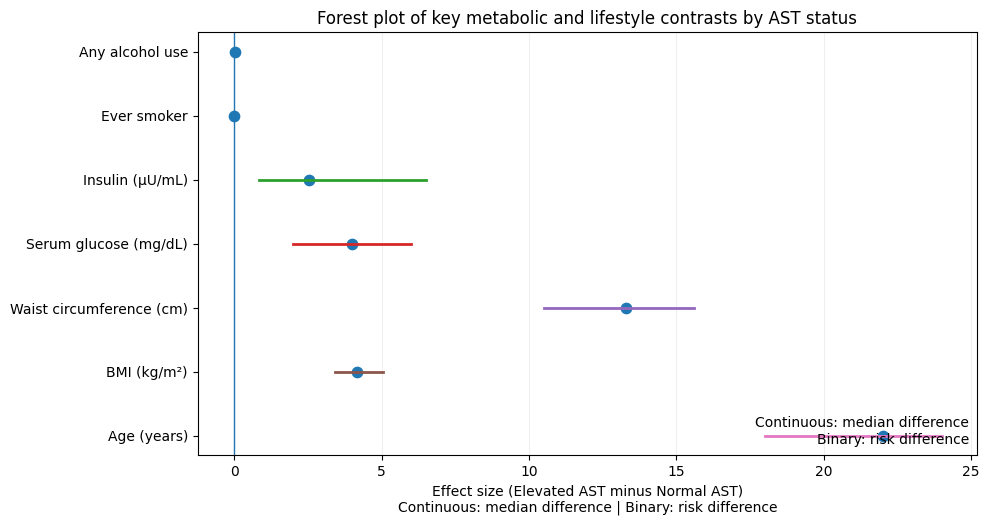

,Characteristic,Type,Effect,CI_low,CI_high
0,Any alcohol use,Binary,0.009349,-0.039471,0.052052
1,Ever smoker,Binary,0.000000,0.000000,0.000000
2,Insulin (µU/mL),Continuous,2.540000,0.830000,6.490375
3,Serum glucose (mg/dL),Continuous,4.000000,2.000000,6.000000
4,Waist circumference (cm),Continuous,13.300000,10.500000,15.600000
5,BMI (kg/m²),Continuous,4.150000,3.400000,5.050000
6,Age (years),Continuous,22.000000,18.000000,24.000000


In [152]:
# Forest style plot for baseline contrasts by AST group
# Uses median difference (Elevated minus Normal) for continuous variables
# Uses risk difference (Elevated minus Normal) for binary variables
# Output is one clean forest plot (all effects on the same scale: difference)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 0) REQUIRED INPUTS
# -----------------------------
# Expected:
# df_all contains your analysis dataset
# elevated_ast is your binary outcome (1 = elevated AST, 0 = normal AST)
# If your outcome column is named differently, change outcome_col below.

outcome_col = "elevated_ast"   # change if needed
df = df_all.copy()

# -----------------------------
# 1) CREATE SIMPLE BINARY LIFESTYLE FLAGS
# -----------------------------
# Smoking flag: ever smoker = former or current smoker
# Adjust labels if yours differ (print df["smoking_status"].value_counts() to confirm)
if "smoking_status" in df.columns:
    df["ever_smoker"] = df["smoking_status"].astype("object").astype(str).str.lower().map(
        lambda x: np.nan if x in ["nan", "none"] else x
    )
    df["ever_smoker"] = df["ever_smoker"].apply(
        lambda x: np.nan if pd.isna(x) else (0 if "never" in x else 1)
    )

# Alcohol flag: any drinking vs non drinker
# If you already have alcohol_frequency_grouped, we use it.
# Otherwise we try alcohol_frequency.
if "alcohol_frequency_grouped" in df.columns:
    s = df["alcohol_frequency_grouped"].astype("object").astype(str).str.lower()
    df["any_alcohol"] = np.where(s.isin(["non drinker", "nondrinker", "non-drinker"]), 0,
                         np.where(s.isin(["nan", "missing", "none"]), np.nan, 1))
elif "alcohol_frequency" in df.columns:
    s = df["alcohol_frequency"].astype("object").astype(str).str.lower()
    # Treat "never" or "non drinker" as 0, everything else as 1
    df["any_alcohol"] = np.where(s.str.contains("never|non", na=False), 0,
                         np.where(s.isin(["nan", "missing", "none"]), np.nan, 1))

# Physically inactive: if you already have physically_inactive as 0/1, keep it.
# If you have physical_activity_status with values Active/Inactive, convert.
if "physically_inactive" not in df.columns and "physical_activity_status" in df.columns:
    s = df["physical_activity_status"].astype("object").astype(str).str.lower()
    df["physically_inactive"] = np.where(s.str.contains("inactive", na=False), 1,
                                 np.where(s.str.contains("active", na=False), 0, np.nan))

# -----------------------------
# 2) BOOTSTRAP HELPERS
# -----------------------------
def _bootstrap_ci_diff_median(x0, x1, n_boot=2000, ci=0.95, seed=42):
    """
    Median difference: med(x1) - med(x0) with bootstrap CI.
    """
    rng = np.random.default_rng(seed)
    x0 = np.asarray(pd.Series(x0).dropna(), dtype=float)
    x1 = np.asarray(pd.Series(x1).dropna(), dtype=float)

    if len(x0) < 10 or len(x1) < 10:
        return np.nan, (np.nan, np.nan)

    diffs = np.empty(n_boot, dtype=float)
    n0, n1 = len(x0), len(x1)
    for i in range(n_boot):
        s0 = x0[rng.integers(0, n0, n0)]
        s1 = x1[rng.integers(0, n1, n1)]
        diffs[i] = np.median(s1) - np.median(s0)

    alpha = (1 - ci) / 2
    lo = np.quantile(diffs, alpha)
    hi = np.quantile(diffs, 1 - alpha)
    point = np.median(x1) - np.median(x0)
    return point, (lo, hi)

def _bootstrap_ci_risk_diff(x0, x1, n_boot=2000, ci=0.95, seed=42):
    """
    Risk difference: P(x1=1) - P(x0=1) with bootstrap CI.
    """
    rng = np.random.default_rng(seed)
    x0 = pd.Series(x0).dropna()
    x1 = pd.Series(x1).dropna()

    # force binary numeric
    x0 = pd.to_numeric(x0, errors="coerce").dropna()
    x1 = pd.to_numeric(x1, errors="coerce").dropna()

    if len(x0) < 10 or len(x1) < 10:
        return np.nan, (np.nan, np.nan)

    n0, n1 = len(x0), len(x1)

    diffs = np.empty(n_boot, dtype=float)
    for i in range(n_boot):
        s0 = x0.iloc[rng.integers(0, n0, n0)].values
        s1 = x1.iloc[rng.integers(0, n1, n1)].values
        diffs[i] = np.mean(s1 == 1) - np.mean(s0 == 1)

    alpha = (1 - ci) / 2
    lo = np.quantile(diffs, alpha)
    hi = np.quantile(diffs, 1 - alpha)
    point = np.mean(x1 == 1) - np.mean(x0 == 1)
    return point, (lo, hi)

# -----------------------------
# 3) DEFINE WHAT YOU WANT IN THE FOREST PLOT
# -----------------------------
# Edit this list to match your columns exactly.
continuous_vars = [
    ("Age (years)", "age_years"),
    ("BMI (kg/m²)", "bmi"),
    ("Waist circumference (cm)", "waist_circumference_cm"),
    ("Serum glucose (mg/dL)", "serum_glucose_refrigerated_mg_dl"),
    ("Insulin (µU/mL)", "insulin_uU_ml"),
]

binary_vars = [
    ("Ever smoker", "ever_smoker"),
    ("Any alcohol use", "any_alcohol"),
    ("Physically inactive", "physically_inactive"),
]

# Keep only variables that exist
continuous_vars = [(lab, col) for lab, col in continuous_vars if col in df.columns]
binary_vars = [(lab, col) for lab, col in binary_vars if col in df.columns]

# -----------------------------
# 4) COMPUTE EFFECTS (Elevated minus Normal)
# -----------------------------
df0 = df[df[outcome_col] == 0]
df1 = df[df[outcome_col] == 1]

rows = []

for label, col in continuous_vars:
    est, (lo, hi) = _bootstrap_ci_diff_median(df0[col], df1[col])
    rows.append({
        "Characteristic": label,
        "Type": "Continuous",
        "Effect": est,
        "CI_low": lo,
        "CI_high": hi
    })

for label, col in binary_vars:
    est, (lo, hi) = _bootstrap_ci_risk_diff(df0[col], df1[col])
    rows.append({
        "Characteristic": label,
        "Type": "Binary",
        "Effect": est,
        "CI_low": lo,
        "CI_high": hi
    })

effects = pd.DataFrame(rows).dropna(subset=["Effect"])

# Order: continuous first then binary (as specified)
effects["order"] = np.arange(len(effects))[::-1]
effects = effects.sort_values(["Type", "order"], ascending=[True, True]).reset_index(drop=True)

# -----------------------------
# 5) PLOT FOREST
# -----------------------------
fig_h = max(5, 0.55 * len(effects) + 1.5)
plt.figure(figsize=(10, fig_h))

y = np.arange(len(effects))
x = effects["Effect"].values
xerr_low = x - effects["CI_low"].values
xerr_high = effects["CI_high"].values - x

# horizontal CI lines
for i in range(len(effects)):
    plt.plot([effects.loc[i, "CI_low"], effects.loc[i, "CI_high"]], [y[i], y[i]], linewidth=2)

# point estimates
plt.scatter(x, y, s=55)

# reference line at zero difference
plt.axvline(0, linewidth=1)

# y labels
plt.yticks(y, effects["Characteristic"])

# axis labels
plt.xlabel("Effect size (Elevated AST minus Normal AST)\nContinuous: median difference | Binary: risk difference")
plt.title("Forest plot of key metabolic and lifestyle contrasts by AST status")

# tidy
plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.2)

# add a small legend text block
plt.text(
    0.99, 0.02,
    "Continuous: median difference\nBinary: risk difference",
    transform=plt.gca().transAxes,
    ha="right", va="bottom"
)

plt.tight_layout()
plt.show()

# Optional: show the numeric effect table used for the plot
effects[["Characteristic", "Type", "Effect", "CI_low", "CI_high"]]

In [189]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu, chi2_contingency

# -----------------------------
# CONFIG
# -----------------------------
OUTCOME_COL = "elevated_ast"   # 1 = elevated AST, 0 = normal AST

# Expected columns (change only if yours differ)
COL_AGE   = "age_years"
COL_SEX   = "sex"  # should be "male"/"female" OR 1/2, code handles both
COL_GLU   = "serum_glucose_refrigerated_mg_dl"
COL_INS   = "insulin_uU_ml"
COL_BMI   = "bmi"
COL_WAIST = "waist_circumference_cm"

COL_SMOKE = "smoking_status"             # e.g., Never smoker / Former smoker / Current smoker
COL_ALC   = "alcohol_frequency_grouped"  # e.g., Non drinker / Occasional / Monthly to weekly / Weekly or more
COL_INACT = "physically_inactive"        # should be 1/0; if not present, see section below

df = df_all.copy()

# -----------------------------
# HELPERS
# -----------------------------
def fmt_p(p):
    if pd.isna(p):
        return ""
    return "<0.001" if p < 0.001 else f"{p:.3f}"

def median_iqr(x):
    x = pd.to_numeric(pd.Series(x), errors="coerce").dropna()
    if len(x) == 0:
        return ""
    q1, q3 = np.percentile(x, [25, 75])
    return f"{np.median(x):.1f} ({q1:.1f}–{q3:.1f})"

def n_pct(n, d):
    if d == 0:
        return ""
    return f"{int(n)} ({(n/d)*100:.1f}%)"

def mannwhitney_p(x0, x1):
    x0 = pd.to_numeric(pd.Series(x0), errors="coerce").dropna()
    x1 = pd.to_numeric(pd.Series(x1), errors="coerce").dropna()
    if len(x0) < 5 or len(x1) < 5:
        return np.nan
    return mannwhitneyu(x0, x1, alternative="two-sided").pvalue

def chisq_p(series, group):
    s = pd.Series(series).astype("object")
    g = pd.Series(group)
    tmp = pd.DataFrame({"s": s, "g": g}).dropna()
    if tmp.empty:
        return np.nan
    tab = pd.crosstab(tmp["s"], tmp["g"])
    if tab.shape[0] < 2 or tab.shape[1] < 2:
        return np.nan
    return chi2_contingency(tab)[1]

# -----------------------------
# ENSURE LIFESTYLE VARIABLES ARE COMPACT BINARY FLAGS
# -----------------------------
# Smoking: Ever smoker (former or current) vs Never
if COL_SMOKE in df.columns:
    s = df[COL_SMOKE].astype("object").astype(str).str.lower()
    df["ever_smoker"] = np.where(s.str.contains("never", na=False), 0,
                         np.where(s.isin(["nan", "missing", "none"]), np.nan, 1))
else:
    df["ever_smoker"] = np.nan

# Alcohol: Any drinking vs Non drinker (uses your grouped alcohol if present)
if COL_ALC in df.columns:
    a = df[COL_ALC].astype("object").astype(str).str.lower()
    df["any_alcohol"] = np.where(a.str.contains("non", na=False), 0,
                         np.where(a.isin(["nan", "missing", "none"]), np.nan, 1))
else:
    df["any_alcohol"] = np.nan

# Physically inactive: if you already have physically_inactive, keep it
# If not, attempt conversion from physical_activity_status (Active/Inactive)
if COL_INACT not in df.columns and "physical_activity_status" in df.columns:
    pa = df["physical_activity_status"].astype("object").astype(str).str.lower()
    df[COL_INACT] = np.where(pa.str.contains("inactive", na=False), 1,
                     np.where(pa.str.contains("active", na=False), 0, np.nan))

# -----------------------------
# SPLIT GROUPS
# -----------------------------
df0 = df[df[OUTCOME_COL] == 0].copy()
df1 = df[df[OUTCOME_COL] == 1].copy()

n_all = len(df)
n0 = len(df0)
n1 = len(df1)

# -----------------------------
# BUILD COMPACT TABLE 3
# -----------------------------
rows = []

# Sample size
rows.append({
    "Characteristic": "Sample size, n",
    "Overall": f"{n_all:,}",
    "Normal AST": f"{n0:,}",
    "Elevated AST": f"{n1:,}",
    "p value": ""
})

# Age
p_age = mannwhitney_p(df0[COL_AGE], df1[COL_AGE]) if COL_AGE in df.columns else np.nan
rows.append({
    "Characteristic": "Age (years), median (IQR)",
    "Overall": median_iqr(df[COL_AGE]) if COL_AGE in df.columns else "",
    "Normal AST": median_iqr(df0[COL_AGE]) if COL_AGE in df.columns else "",
    "Elevated AST": median_iqr(df1[COL_AGE]) if COL_AGE in df.columns else "",
    "p value": fmt_p(p_age)
})

# Sex (female and male)
# Handles either string labels or numeric codes
if COL_SEX in df.columns:
    sex_series = df[COL_SEX].astype("object")
    sex_lower = sex_series.astype(str).str.lower()
    # Map common numeric codings if present
    sex_clean = np.where(sex_lower.isin(["1", "male", "m"]), "Male",
                 np.where(sex_lower.isin(["2", "female", "f"]), "Female",
                 sex_series.astype(str)))
    df["_sex_clean"] = sex_clean
    df0["_sex_clean"] = df0[COL_SEX].astype("object").astype(str)
    df1["_sex_clean"] = df1[COL_SEX].astype("object").astype(str)

    # Use df mapped values for p value
    p_sex = chisq_p(df["_sex_clean"], df[OUTCOME_COL])

    for cat in ["Female", "Male"]:
        rows.append({
            "Characteristic": f"Sex: {cat}, n (%)",
            "Overall": n_pct((df["_sex_clean"] == cat).sum(), n_all),
            "Normal AST": n_pct((df0["_sex_clean"].astype(str).str.lower().isin([cat.lower()])).sum(), n0),
            "Elevated AST": n_pct((df1["_sex_clean"].astype(str).str.lower().isin([cat.lower()])).sum(), n1),
            "p value": fmt_p(p_sex) if cat == "Female" else ""
        })

# Metabolic continuous variables
cont_vars = [
    ("Serum glucose (mg/dL), median (IQR)", COL_GLU),
    ("Insulin (µU/mL), median (IQR)", COL_INS),
    ("Body mass index (kg/m²), median (IQR)", COL_BMI),
    ("Waist circumference (cm), median (IQR)", COL_WAIST),
]
for label, col in cont_vars:
    if col not in df.columns:
        continue
    p = mannwhitney_p(df0[col], df1[col])
    rows.append({
        "Characteristic": label,
        "Overall": median_iqr(df[col]),
        "Normal AST": median_iqr(df0[col]),
        "Elevated AST": median_iqr(df1[col]),
        "p value": fmt_p(p)
    })

# Lifestyle binary variables
bin_vars = [
    ("Ever smoker, n (%)", "ever_smoker"),
    ("Any alcohol use, n (%)", "any_alcohol"),
    ("Physically inactive, n (%)", COL_INACT),
]
for label, col in bin_vars:
    if col not in df.columns:
        continue

    # Convert to numeric 0/1 where possible
    s_all = pd.to_numeric(df[col], errors="coerce")
    s0 = pd.to_numeric(df0[col], errors="coerce")
    s1 = pd.to_numeric(df1[col], errors="coerce")

    # p value (chi-square on 0/1)
    p = chisq_p(s_all.dropna().astype(int).astype(str), df.loc[s_all.notna(), OUTCOME_COL])

    # counts
    denom_all = int(s_all.notna().sum())
    denom_0 = int(s0.notna().sum())
    denom_1 = int(s1.notna().sum())

    rows.append({
        "Characteristic": label,
        "Overall": n_pct((s_all == 1).sum(), denom_all),
        "Normal AST": n_pct((s0 == 1).sum(), denom_0),
        "Elevated AST": n_pct((s1 == 1).sum(), denom_1),
        "p value": fmt_p(p)
    })

table3_compact = pd.DataFrame(rows, columns=["Characteristic", "Overall", "Normal AST", "Elevated AST", "p value"])

# Display
table3_compact

,Characteristic,Overall,Normal AST,Elevated AST,p value
0,"Sample size, n","10,175","9,776",399,
1,"Age (years), median (IQR)",26.0 (10.0–52.0),25.0 (9.0–51.0),47.0 (30.0–61.0),<0.001
2,"Sex: Female, n (%)",5172 (50.8%),4977 (50.9%),195 (48.9%),0.455
3,"Sex: Male, n (%)",5003 (49.2%),4799 (49.1%),204 (51.1%),
4,"Serum glucose (mg/dL), median (IQR)",93.0 (86.0–104.0),93.0 (86.0–103.0),97.0 (87.0–116.0),<0.001
5,"Insulin (µU/mL), median (IQR)",9.5 (6.1–15.3),9.3 (6.1–15.0),11.9 (6.0–26.1),<0.001
6,"Body mass index (kg/m²), median (IQR)",24.7 (19.7–30.2),24.5 (19.5–30.0),28.6 (24.6–34.5),<0.001
7,"Waist circumference (cm), median (IQR)",87.8 (71.2–102.8),87.1 (70.5–102.2),100.4 (88.5–113.6),<0.001
8,"Ever smoker, n (%)",2579 (100.0%),2400 (100.0%),179 (100.0%),
9,"Any alcohol use, n (%)",3593 (80.3%),3356 (80.2%),237 (81.2%),0.755


In [154]:
# -------------------------------------------------
# FIX: Ensure physically inactive is numeric (0/1)
# -------------------------------------------------

if "physically_inactive" in df.columns:
    df["physically_inactive_bin"] = pd.to_numeric(
        df["physically_inactive"], errors="coerce"
    )
else:
    raise ValueError("Column 'physically_inactive' not found in dataframe")

# Split groups
s_all = df["physically_inactive_bin"]
s0 = df.loc[df["elevated_ast"] == 0, "physically_inactive_bin"]
s1 = df.loc[df["elevated_ast"] == 1, "physically_inactive_bin"]

# Denominators (non-missing only)
denom_all = s_all.notna().sum()
denom_0 = s0.notna().sum()
denom_1 = s1.notna().sum()

# Chi-square p value
p_inact = chisq_p(
    s_all.dropna().astype(int).astype(str),
    df.loc[s_all.notna(), "elevated_ast"]
)

# Append row
rows.append({
    "Characteristic": "Physically inactive, n (%)",
    "Overall": n_pct((s_all == 1).sum(), denom_all),
    "Normal AST": n_pct((s0 == 1).sum(), denom_0),
    "Elevated AST": n_pct((s1 == 1).sum(), denom_1),
    "p value": fmt_p(p_inact)
})

# Rebuild final table
table3_compact = pd.DataFrame(
    rows,
    columns=["Characteristic", "Overall", "Normal AST", "Elevated AST", "p value"]
)

table3_compact

,Characteristic,Overall,Normal AST,Elevated AST,p value
0,"Sample size, n","10,175","9,776",399,
1,"Age (years), median (IQR)",26.0 (10.0–52.0),25.0 (9.0–51.0),47.0 (30.0–61.0),<0.001
2,"Sex: Female, n (%)",5172 (50.8%),4977 (50.9%),195 (48.9%),0.455
3,"Sex: Male, n (%)",5003 (49.2%),4799 (49.1%),204 (51.1%),
4,"Serum glucose (mg/dL), median (IQR)",93.0 (86.0–104.0),93.0 (86.0–103.0),97.0 (87.0–116.0),<0.001
5,"Insulin (µU/mL), median (IQR)",9.5 (6.1–15.3),9.3 (6.1–15.0),11.9 (6.0–26.1),<0.001
6,"Body mass index (kg/m²), median (IQR)",24.7 (19.7–30.2),24.5 (19.5–30.0),28.6 (24.6–34.5),<0.001
7,"Waist circumference (cm), median (IQR)",87.8 (71.2–102.8),87.1 (70.5–102.2),100.4 (88.5–113.6),<0.001
8,"Ever smoker, n (%)",2579 (100.0%),2400 (100.0%),179 (100.0%),
9,"Any alcohol use, n (%)",3593 (80.3%),3356 (80.2%),237 (81.2%),0.755


# **NATIONAL HEALTH AND NUTRITION DATASET**

In [ ]:
health = pd.read_csv('/kaggle/input/national-health-and-nutrition-examination-survey/diet.csv')
type(health)

print(health.shape)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
health.head()

In [ ]:
health.hist(column="DR1DAY", figsize=(4,4), color="green", bins=10, range=(0,5));

In [ ]:
health[health["DR1DAY"]> 6]

In [ ]:
health.boxplot(column="DR1DAY");